This document provides a comprehensive overview of the livestock data processing and aggregation pipeline. The livestock data is sourced from Harvard Dataverse for 2010 and 2015, and from FAO for 2020. Detailed sources are provided below:

Data Sources:

2010 Livestock Data: Harvard Dataverse
2015 Livestock Data: Harvard Dataverse
2020 Livestock Data: FAO Livestock Systems

2010 data source:

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/GIVQ75

2015 data source:

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/LHBICE

2020 data soruce:

https://data.apps.fao.org/catalog//iso/9d1e149b-d63f-4213-978b-317a8eb42d02


Coordinate System: All datasets use the geographic coordinate system EPSG:4326.

Resolution: The data processing was carried out at a spatial resolution of 0.0083333 degrees (approximately 1 km at the equator), with aggregation to 0.083333 degrees (approximately 10 km at the equator) for distribution. This multi-scale approach accounts for spatial variability in data resolution, enhancing the accuracy of livestock distribution analysis. [Source: Harvard Dataverse documentation for livestock datasets]

Data Processing Steps
Data Extraction and Interpretation:

For 2010 and 2015 datasets, each pixel’s Digital Number (DN) value represents the total number of livestock within that pixel’s geographical extent. Therefore, the DN values directly correspond to livestock counts for these years.
For the 2020 dataset, however, the DN value represents livestock density (livestock per square kilometer). To convert this to absolute livestock counts, each pixel's DN value is multiplied by its area in square kilometers, calculated based on the pixel's geographic size.
Handling No-Data Values:

Each dataset includes specific no-data indicators (DN values representing missing or invalid data) as documented in the metadata. These no-data values are identified and excluded during processing to ensure that only valid livestock counts are included in the analysis.
Geospatial Masking and Boundary Definition:

U.S. county boundaries were obtained from the U.S. Census Bureau’s county shapefiles. These boundaries were used to mask the datasets, restricting the data collection to within the boundaries of the United States.
For each livestock dataset, the U.S. county shapefile was applied as a mask, ensuring that only livestock counts within the continental U.S., Alaska, and Hawaii were included.
Aggregation at Different Administrative Levels:

County-Level Aggregation: For each county, pixel-level DN values were summed to obtain the total livestock count per county. Each pixel within a county boundary contributes to the aggregate count for that specific county.
State-Level Aggregation: Using a similar approach, livestock data was aggregated at the state level by applying a state shapefile as a mask and summing pixel values within each state boundary.
ZIP Code-Level Aggregation: ZIP code-level aggregation was also performed by using a ZIP code shapefile as a mask. This provides an additional layer of granularity for data analysis.
Verification and Validation:

Multiple validation checks were performed throughout the data processing to ensure accuracy. Visual checks were conducted at various stages to compare the output against the original dataset’s visual representation, ensuring that spatial distribution patterns were preserved.
For county data, totals were compared with expected patterns to verify that data aggregation aligned correctly with each administrative boundary.
Direct Pixel-Level Verification:

To verify the accuracy of the data extraction, a subset of pixel-level data was processed directly without aggregation, enabling visual comparison with the original rasters. This step confirmed that livestock counts and densities were being read and processed correctly for each year.
Visualization:

Visualizations were generated at multiple stages to validate data integrity and alignment. Various scaling methods were applied to accommodate different ranges of livestock densities, ensuring that high-density areas were distinguishable in the output maps.
Final Output
The processed livestock data is aggregated at three administrative levels:

State-Level: Aggregated total livestock count by state.
County-Level: Aggregated total livestock count by county.
ZIP Code-Level: Aggregated total livestock count by ZIP code.
Additionally, a direct pixel-based dataset was created, providing livestock counts and densities at each individual pixel, allowing for more granular analysis.

Each output dataset is stored in CSV format, with columns indicating latitude, longitude, and livestock counts for each livestock type (e.g., chicken, cattle, pig) across the years 2010, 2015, and 2020. The 2020 data specifically includes adjustments for density-to-count conversion, and all datasets maintain consistency in coordinate systems and no-data handling.

This processed dataset serves as a comprehensive resource for analyzing livestock distribution trends across multiple years at varying administrative levels.

Install required libraries

In [ ]:
# ! pip install rioxarray
# ! pip install geopandas
# ! pip install rasterstats
# !pip install geopandas rasterio pandas openpyxl
#...


Import Libararies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rxr
from rasterstats import zonal_stats
import pandas as pd
import openpyxl
import rasterio
import tifffile

Investigate metada and contents of file.

In [ ]:
import rasterio

# Path to your uploaded .tif file
tif_file_path = '5_Bf_2010_Da.tif'

# Open the .tif file and view metadata
with rasterio.open(tif_file_path) as dataset:
    print("Metadata for the GeoTIFF file:")
    print(dataset.meta)  # This gives information like width, height, CRS, etc.

    # Optionally, print the bounds (geographical extents)
    print("\nBounds of the dataset:")
    print(dataset.bounds)

    # Print the shape of the dataset (rows, cols, and bands)
    print("\nDataset shape (rows, cols, bands):")
    print(dataset.shape)

    # Optionally, print the coordinate reference system (CRS)
    print("\nCoordinate Reference System (CRS):")
    print(dataset.crs)


Metadata for the GeoTIFF file:
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': -1.7e+308, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}

Bounds of the dataset:
BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)

Dataset shape (rows, cols, bands):
(2160, 4320)

Coordinate Reference System (CRS):
EPSG:4326


In [ ]:
import rasterio

# Path to your uploaded .tif file
tif_file_path = '5_Bf_2010_Da.tif'

# Open the .tif file and view metadata
with rasterio.open(tif_file_path) as dataset:
    print("Metadata for the GeoTIFF file:")
    print(dataset.meta)  # This gives information like width, height, CRS, etc.

    # Optionally, print the bounds (geographical extents)
    print("\nBounds of the dataset:")
    print(dataset.bounds)

    # Print the shape of the dataset (rows, cols, and bands)
    print("\nDataset shape (rows, cols, bands):")
    print(dataset.shape)

    # Optionally, print the coordinate reference system (CRS)
    print("\nCoordinate Reference System (CRS):")
    print(dataset.crs)


In [ ]:
import rasterio

# Path to your uploaded .tif file
tif_file_path = '/content/5_Ho_2015_Da.tif'

# Open the .tif file and view metadata
with rasterio.open(tif_file_path) as dataset:
    print("Metadata for the GeoTIFF file:")
    print(dataset.meta)  # This gives information like width, height, CRS, etc.

    # Optionally, print the bounds (geographical extents)
    print("\nBounds of the dataset:")
    print(dataset.bounds)

    # Print the shape of the dataset (rows, cols, and bands)
    print("\nDataset shape (rows, cols, bands):")
    print(dataset.shape)

    # Optionally, print the coordinate reference system (CRS)
    print("\nCoordinate Reference System (CRS):")
    print(dataset.crs)


Metadata for the GeoTIFF file:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}

Bounds of the dataset:
BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)

Dataset shape (rows, cols, bands):
(2160, 4320)

Coordinate Reference System (CRS):
EPSG:4326


In [ ]:
import rasterio

# Path to your uploaded .tif file
tif_file_path = '/content/GLW4-2020.D-DA.BFL.tif'

# Open the .tif file and view metadata
with rasterio.open(tif_file_path) as dataset:
    print("Metadata for the GeoTIFF file:")
    print(dataset.meta)  # This gives information like width, height, CRS, etc.

    # Optionally, print the bounds (geographical extents)
    print("\nBounds of the dataset:")
    print(dataset.bounds)

    # Print the shape of the dataset (rows, cols, and bands)
    print("\nDataset shape (rows, cols, bands):")
    print(dataset.shape)

    # Optionally, print the coordinate reference system (CRS)
    print("\nCoordinate Reference System (CRS):")
    print(dataset.crs)


Metadata for the GeoTIFF file:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0833333333333333, 0.0, -180.0,
       0.0, -0.0833333333333333, 90.0)}

Bounds of the dataset:
BoundingBox(left=-180.0, bottom=-89.99999999999994, right=179.9999999999999, top=90.0)

Dataset shape (rows, cols, bands):
(2160, 4320)

Coordinate Reference System (CRS):
EPSG:4326


In [ ]:
import geopandas as gpd

# Load shapefile (replace the path with your shapefile)
shapefile_path = '/content/cb_2023_us_state_500k.shp'

# Read the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# View basic information about the shapefile
print("Shapefile Metadata:")
print(gdf.info())

# View the first few rows of the shapefile data
print("\nFirst few rows of the shapefile:")
print(gdf.head())

# View the coordinate reference system (CRS) of the shapefile
print("\nShapefile CRS:")
print(gdf.crs)


Shapefile Metadata:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   56 non-null     object  
 1   STATENS   56 non-null     object  
 2   GEOIDFQ   56 non-null     object  
 3   GEOID     56 non-null     object  
 4   STUSPS    56 non-null     object  
 5   NAME      56 non-null     object  
 6   LSAD      56 non-null     object  
 7   ALAND     56 non-null     int64   
 8   AWATER    56 non-null     int64   
 9   geometry  56 non-null     geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 4.5+ KB
None

First few rows of the shapefile:
  STATEFP   STATENS      GEOIDFQ GEOID STUSPS          NAME LSAD  \
0      35  00897535  0400000US35    35     NM    New Mexico   00   
1      46  01785534  0400000US46    46     SD  South Dakota   00   
2      06  01779778  0400000US06    06     CA    California   00   
3      21  0177

In [ ]:
import geopandas as gpd

# Load shapefile (replace the path with your shapefile)
shapefile_path = '/content/cb_2023_us_county_500k.shp'

# Read the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# View basic information about the shapefile
print("Shapefile Metadata:")
print(gdf.info())

# View the first few rows of the shapefile data
print("\nFirst few rows of the shapefile:")
print(gdf.head())

# View the coordinate reference system (CRS) of the shapefile
print("\nShapefile CRS:")
print(gdf.crs)


Shapefile Metadata:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP     3235 non-null   object  
 1   COUNTYFP    3235 non-null   object  
 2   COUNTYNS    3235 non-null   object  
 3   GEOIDFQ     3235 non-null   object  
 4   GEOID       3235 non-null   object  
 5   NAME        3235 non-null   object  
 6   NAMELSAD    3235 non-null   object  
 7   STUSPS      3235 non-null   object  
 8   STATE_NAME  3235 non-null   object  
 9   LSAD        3235 non-null   object  
 10  ALAND       3235 non-null   int64   
 11  AWATER      3235 non-null   int64   
 12  geometry    3235 non-null   geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 328.7+ KB
None

First few rows of the shapefile:
  STATEFP COUNTYFP  COUNTYNS         GEOIDFQ  GEOID     NAME        NAMELSAD  \
0      01      003  00161527  0500000US01003  0100

In [ ]:
import geopandas as gpd

# Load shapefile (replace the path with your shapefile)
shapefile_path = '/content/tl_2020_us_zcta520.shp'

# Read the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# View basic information about the shapefile
print("Shapefile Metadata:")
print(gdf.info())

# View the first few rows of the shapefile data
print("\nFirst few rows of the shapefile:")
print(gdf.head())

# View the coordinate reference system (CRS) of the shapefile
print("\nShapefile CRS:")
print(gdf.crs)


Shapefile Metadata:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33791 entries, 0 to 33790
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZCTA5CE20   33791 non-null  object  
 1   GEOID20     33791 non-null  object  
 2   CLASSFP20   33791 non-null  object  
 3   MTFCC20     33791 non-null  object  
 4   FUNCSTAT20  33791 non-null  object  
 5   ALAND20     33791 non-null  int64   
 6   AWATER20    33791 non-null  int64   
 7   INTPTLAT20  33791 non-null  object  
 8   INTPTLON20  33791 non-null  object  
 9   geometry    33791 non-null  geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 2.6+ MB
None

First few rows of the shapefile:
  ZCTA5CE20 GEOID20 CLASSFP20 MTFCC20 FUNCSTAT20    ALAND20  AWATER20  \
0     35592   35592        B5   G6350          S  298552385    235989   
1     35616   35616        B5   G6350          S  559506992  41870756   
2     35621   35621        B5   G6350 

In [ ]:
import rasterio
import geopandas as gpd

def process_tif_file(tif_file_path):
    """
    Process a GeoTIFF file and print metadata, bounds, shape, and CRS.
    """
    try:
        with rasterio.open(tif_file_path) as dataset:
            print(f"\n--- Metadata for {tif_file_path} ---")
            print(dataset.meta)
            print("\nBounds of the dataset:")
            print(dataset.bounds)
            print("\nDataset shape (rows, cols, bands):")
            print(dataset.shape)
            print("\nCoordinate Reference System (CRS):")
            print(dataset.crs)
    except Exception as e:
        print(f"Error processing {tif_file_path}: {e}")

def process_shapefile(shapefile_path):
    """
    Process a shapefile and print its info, first few rows, and CRS.
    """
    try:
        gdf = gpd.read_file(shapefile_path)
        print(f"\n--- Metadata for {shapefile_path} ---")
        print(gdf.info())
        print("\nFirst few rows of the shapefile data:")
        print(gdf.head())
        print("\nShapefile CRS:")
        print(gdf.crs)
    except Exception as e:
        print(f"Error processing {shapefile_path}: {e}")

# List of GeoTIFF files
tif_files = [
    '/content/5_Ch_2010_Da.tif',  # Replace with actual file paths
    '/content/5_Ch_2015_Da.tif',  # Example for another file
    '/content/GLW4-2020.D-DA.CHK.tif'  # Example for another year
]

# List of shapefiles (for state, county, and zip code boundaries)
shapefiles = [
    '/content/cb_2023_us_state_500k.shp',  # County shapefile
    '/content/cb_2023_us_county_500k.shp',  # Zip code shapefile
    '/content/tl_2020_us_zcta520.shp'  # State boundary shapefile
]

# Process all TIFF files
for tif_file in tif_files:
    process_tif_file(tif_file)

# Process all shapefiles
for shapefile in shapefiles:
    process_shapefile(shapefile)



--- Metadata for /content/5_Ch_2010_Da.tif ---
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': -1.7e+308, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}

Bounds of the dataset:
BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)

Dataset shape (rows, cols, bands):
(2160, 4320)

Coordinate Reference System (CRS):
EPSG:4326

--- Metadata for /content/5_Ch_2015_Da.tif ---
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}

Bounds of the dataset:
BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)

Dataset shape (rows, cols, bands):
(2160, 4320)

Coordinate Reference System (CRS):
EPSG:4326

--- Metadata for /content/GLW4-2020.D-DA.CHK.tif ---
{'driver': 'GTiff', 

Importing necessary packages.

Loading the raster data (GeoTIFF files).

Checking CRS and nodata values.

Cleaning and adjusting the data (removing nodata values, adjusting CRS).

Clipping the raster data to the state boundary shapefile.

Visualizing the raster data with a color bar, capped at a maximum value.

Performing zonal statistics (optional, if needed later).


In [ ]:
!pip install rioxarray geopandas rasterstats

# Importing necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rxr
from rasterstats import zonal_stats
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 8.3 MB/s eta 0:00:00


In [ ]:
# List of GeoTIFF files for each year
tif_files = [
    '/content/5_Ch_2010_Da.tif',  # First year GeoTIFF
    '/content/5_Ch_2015_Da.tif',  # Second year GeoTIFF
    '/content/GLW4-2020.D-DA.CHK.tif'  # Third year GeoTIFF
]

# Load the 2010 raster data as an example
tif_file_path = tif_files[0]  # Select 2010 data
raster_data = rxr.open_rasterio(tif_file_path, masked=True)
raster_data


<xarray.DataArray (band: 1, y: 2160, x: 4320)> Size: 75MB
[9331200 values with dtype=float64]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 35kB -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * y            (y) float64 17kB 89.96 89.88 89.79 ... -89.79 -89.87 -89.96
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:           Area
    STATISTICS_COVARIANCES:  4395041401.872276
    STATISTICS_MAXIMUM:      10530973.506529
    STATISTICS_MEAN:         9529.6132740367
    STATISTICS_MINIMUM:      0
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       66295.108430956
    scale_factor:            1.0
    add_offset:              0.0

In [ ]:
# Check the Coordinate Reference System (CRS)
print("The CRS is:", raster_data.rio.crs)

# Check the spatial extent (bounding box)
print("The spatial extent is:", raster_data.rio.bounds())

# Check the nodata value
print("The nodata value is:", raster_data.rio.nodata)

# Check the minimum and maximum values in the raster data
print("Minimum value:", np.nanmin(raster_data.values))
print("Maximum value:", np.nanmax(raster_data.values))


The CRS is: EPSG:4326
The spatial extent is: (-180.0, -90.0, 179.99999999999994, 90.0)
The nodata value is: nan
Minimum value: 0.0
Maximum value: 10530973.506528964


In [ ]:
# Remove the no data value from the raster data
cleaned_raster = rxr.open_rasterio(tif_file_path, masked=True).squeeze()

# Check the shape after squeezing (removing single band dimension)
cleaned_raster.shape


(2160, 4320)

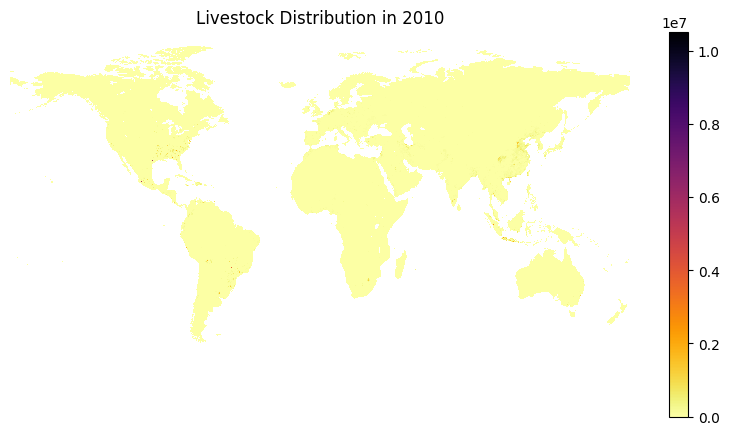

In [ ]:
# Plotting the raster data before capping the values
f, ax = plt.subplots(figsize=(10, 5))
cleaned_raster.plot(cmap="inferno_r", ax=ax)
ax.set_title("Livestock Distribution in 2010")
ax.set_axis_off()
plt.show()


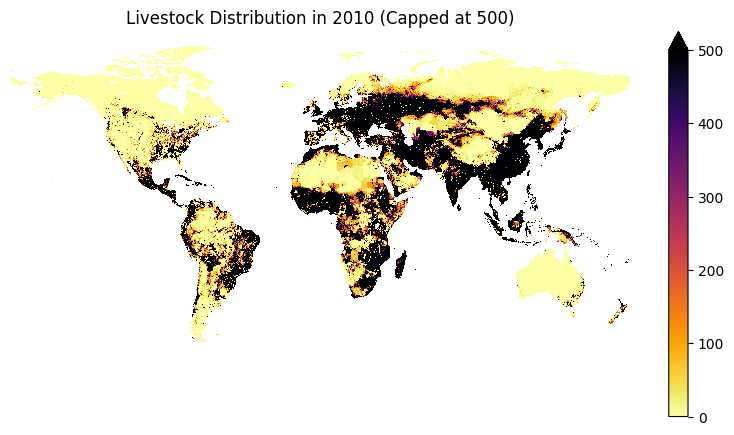

In [ ]:
# Cap the maximum value for visualization to 500
f, ax = plt.subplots(figsize=(10, 5))
cleaned_raster.plot(cmap="inferno_r", ax=ax, vmin=0, vmax=500)  # Capping at 500
ax.set_title("Livestock Distribution in 2010 (Capped at 500)")
ax.set_axis_off()
plt.show()


The CRS of the shapefile is: EPSG:4269


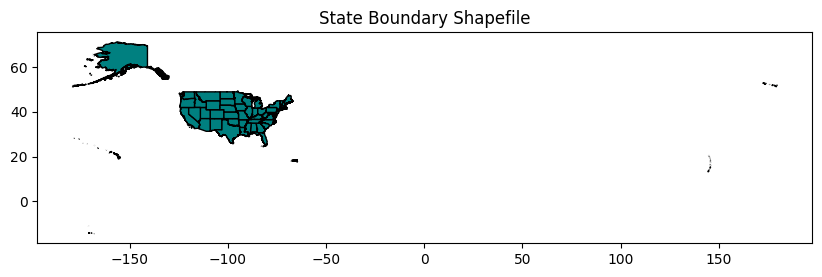

In [ ]:
# Load the state boundary shapefile
state_boundary_shapefile = '/content/cb_2023_us_state_500k.shp'
state_shape = gpd.read_file(state_boundary_shapefile)

# Check the CRS of the shapefile
print("The CRS of the shapefile is:", state_shape.crs)

# Visualize the state boundaries
f, ax = plt.subplots(figsize=(10, 5))
state_shape.plot(color='teal', edgecolor='black', ax=ax)
ax.set_title("State Boundary Shapefile")
plt.show()


In [ ]:
# Reproject the shapefile to match the CRS of the raster (EPSG:4326)
if state_shape.crs != raster_data.rio.crs:
    state_shape = state_shape.to_crs(raster_data.rio.crs)


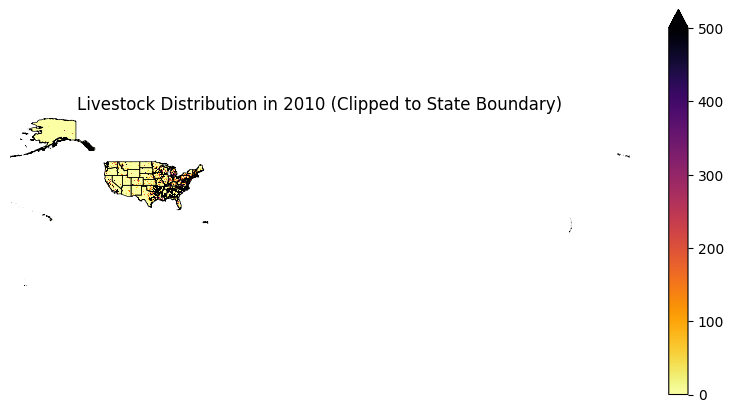

In [ ]:
# Clip the raster to the state boundaries
clipped_raster = cleaned_raster.rio.clip(state_shape.geometry.values, state_shape.crs, drop=True)

# Plot the clipped raster
f, ax = plt.subplots(figsize=(10, 5))
clipped_raster.plot(cmap="inferno_r", ax=ax, vmin=0, vmax=500)  # Capped at 500
state_shape.boundary.plot(ax=ax, edgecolor="black", linewidth=0.5)
ax.set_title("Livestock Distribution in 2010 (Clipped to State Boundary)")
ax.set_axis_off()
plt.show()


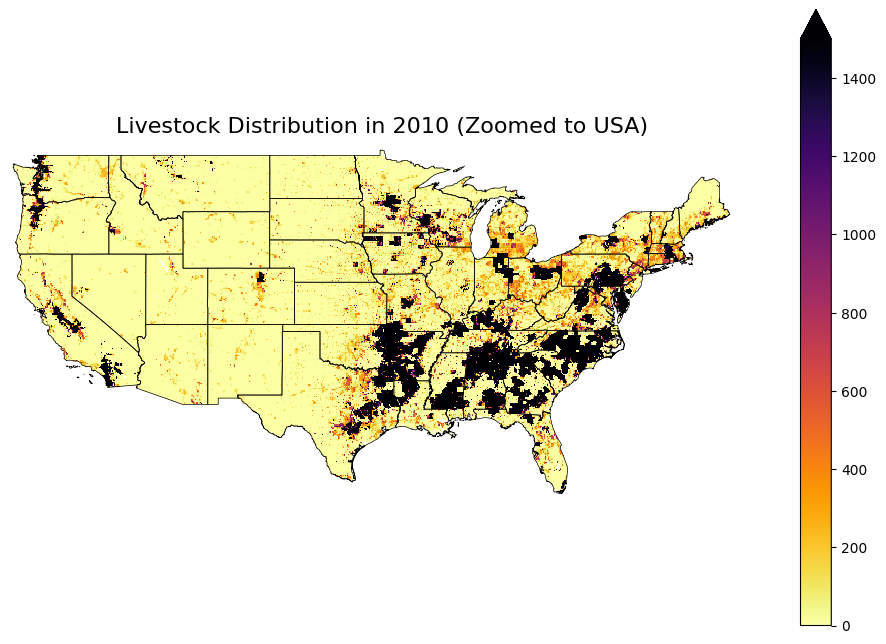

In [ ]:
# Plot the clipped raster with zoomed-in boundaries for mainland USA
f, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size for better clarity

# Plot the raster data with color bar, capping at 1500
clipped_raster.plot(cmap="inferno_r", ax=ax, vmin=0, vmax=1500)

# Plot the state boundaries on top
state_shape.boundary.plot(ax=ax, edgecolor="black", linewidth=0.5)

# Set title and axis labels
ax.set_title("Livestock Distribution in 2010 (Zoomed to USA)", fontsize=16)

# Zoom in to focus on the mainland USA
ax.set_xlim([-125, -65])
ax.set_ylim([25, 50])

# Remove axis ticks for a cleaner look
ax.set_axis_off()

# Display the plot
plt.show()


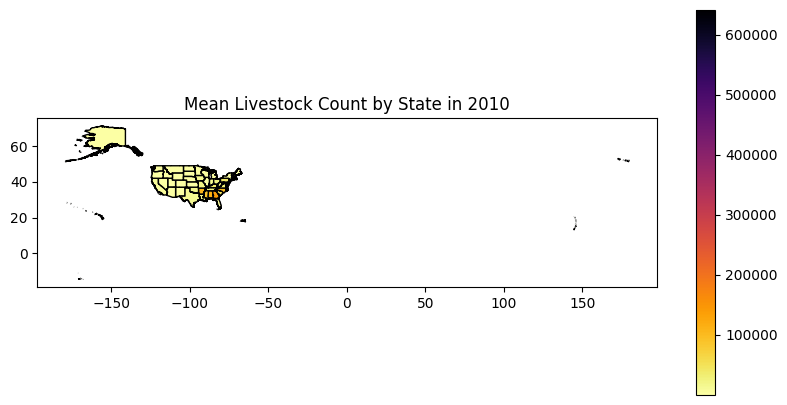

In [ ]:
# Perform zonal statistics for the state boundaries
zonal_stats_df = pd.DataFrame(zonal_stats(vectors=state_shape.geometry, raster=tif_file_path, stats="mean"))
state_shape["mean_livestock"] = zonal_stats_df["mean"]

# Visualize the zonal statistics (mean livestock counts by state)
fig, ax = plt.subplots(figsize=(10, 5))
state_shape.plot(column='mean_livestock', ax=ax, legend=True, cmap='inferno_r', edgecolor='black')
ax.set_title("Mean Livestock Count by State in 2010")
plt.show()


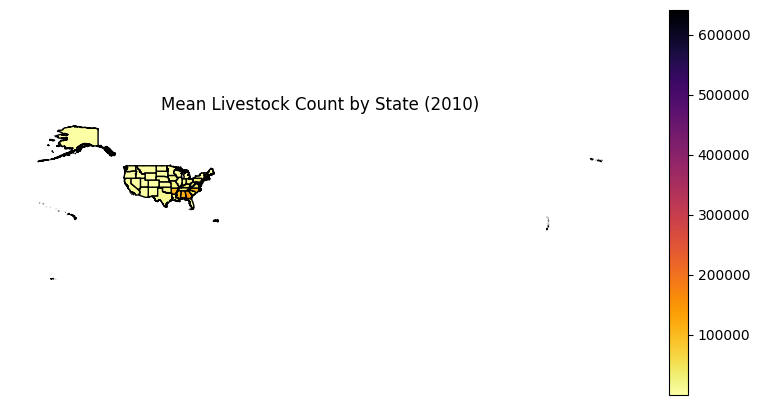

In [ ]:
# Plot the final result with aspect ratio and legend
fig, ax = plt.subplots(figsize=(10, 5))
state_shape.plot(column='mean_livestock', ax=ax, legend=True, cmap='inferno_r', edgecolor='black')
ax.set_title("Mean Livestock Count by State (2010)")
ax.set_axis_off()
plt.show()


Explanation:
Function process_and_plot_tiff:

Loads the raster file.
Removes nodata values.
Clips the raster data using the state boundaries.
Plots the data with a color bar and state boundaries, capping values at the specified maximum (vmax).
Combined Workflow:

The process for the 2010 and 2015 files is identical except for the maximum value cap (vmax). For 2010, the cap is 500, and for 2015, it is 1500.
Both plots use the same zoomed-in view of mainland USA with a figure size of 12x8 for clarity.
Shapefile Reprojection:

We ensure that the shapefile's CRS matches the raster's CRS. If needed, the shapefile is reprojected to the same CRS as the raster data.
Final Plots:
The 2010 data is visualized with a maximum value capped at 500.
The 2015 data is visualized with a maximum value capped at 1500.

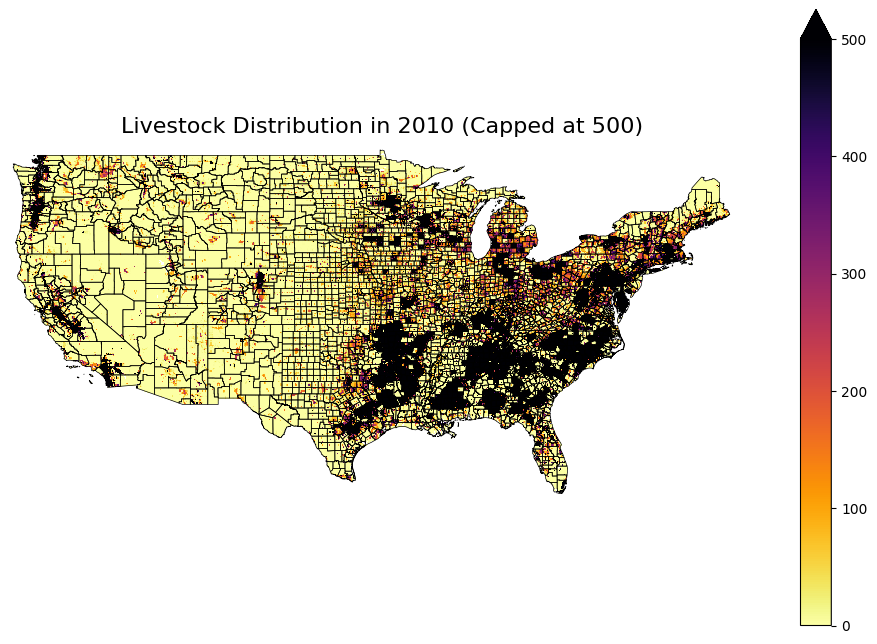

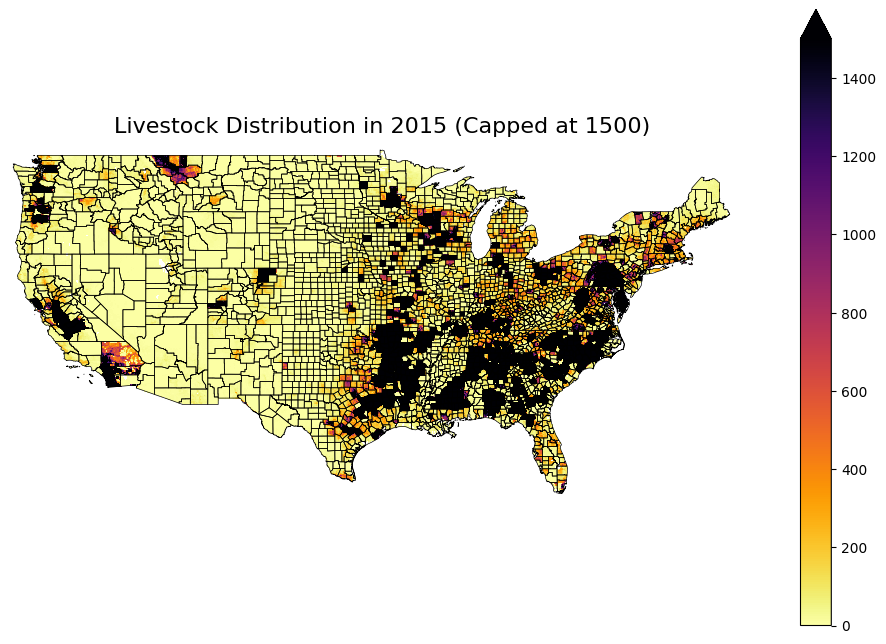

In [ ]:
# Importing necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rxr
from rasterstats import zonal_stats

# List of GeoTIFF files for each year
tif_files = [
    '/content/5_Ch_2010_Da.tif',  # First year GeoTIFF (2010)
    '/content/5_Ch_2015_Da.tif'   # Second year GeoTIFF (2015)
]

# Load the state boundary shapefile
state_boundary_shapefile = '/content/cb_2023_us_county_500k.shp'
state_shape = gpd.read_file(state_boundary_shapefile)

# Reproject the shapefile to match the CRS of the raster if necessary
def reproject_shapefile_to_match_raster(raster, shapefile):
    if shapefile.crs != raster.rio.crs:
        return shapefile.to_crs(raster.rio.crs)
    return shapefile

# Function to clean and plot GeoTIFF data with capped values
def process_and_plot_tiff(tif_file_path, shapefile, nodata_value, vmax, title, xlim=[-125, -65], ylim=[25, 50]):
    # Load the raster data and clean it by removing nodata values
    raster_data = rxr.open_rasterio(tif_file_path, masked=True).squeeze()

    # Clip the raster data to the state boundaries
    clipped_raster = raster_data.rio.clip(shapefile.geometry.values, shapefile.crs, drop=True)

    # Plot the clipped raster with zoomed-in boundaries
    f, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size for better clarity

    # Plot the raster data with color bar, capping at vmax
    clipped_raster.plot(cmap="inferno_r", ax=ax, vmin=0, vmax=vmax)

    # Plot the state boundaries on top
    shapefile.boundary.plot(ax=ax, edgecolor="black", linewidth=0.5)

    # Set title and axis limits for zooming
    ax.set_title(title, fontsize=16)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # Remove axis ticks for a cleaner look
    ax.set_axis_off()

    # Show the plot
    plt.show()

# --- Process and Plot for the 2010 GeoTIFF File ---
tif_file_2010 = tif_files[0]
nodata_2010 = -1.7e+308  # Nodata value for the 2010 file

# Reproject shapefile to match the raster CRS (if needed)
state_shape = reproject_shapefile_to_match_raster(rxr.open_rasterio(tif_file_2010, masked=True), state_shape)

# Process and plot the 2010 data
process_and_plot_tiff(
    tif_file_path=tif_file_2010,
    shapefile=state_shape,
    nodata_value=nodata_2010,
    vmax=500,  # Maximum value for 2010
    title="Livestock Distribution in 2010 (Capped at 500)"
)

# --- Process and Plot for the 2015 GeoTIFF File ---
tif_file_2015 = tif_files[1]
nodata_2015 = -3.3999999521443642e+38  # Nodata value for the 2015 file

# Process and plot the 2015 data
process_and_plot_tiff(
    tif_file_path=tif_file_2015,
    shapefile=state_shape,
    nodata_value=nodata_2015,
    vmax=1500,  # Maximum value for 2015
    title="Livestock Distribution in 2015 (Capped at 1500)"
)


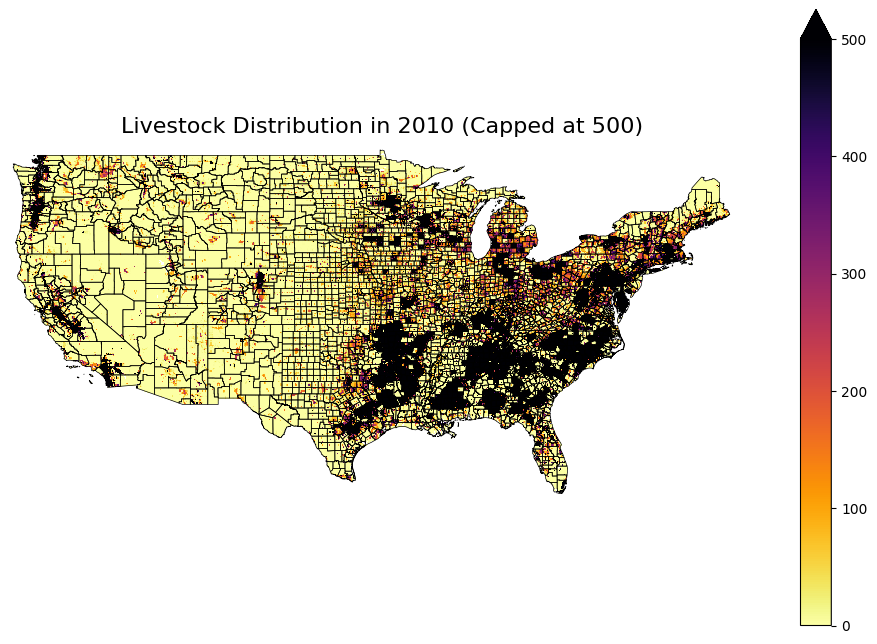

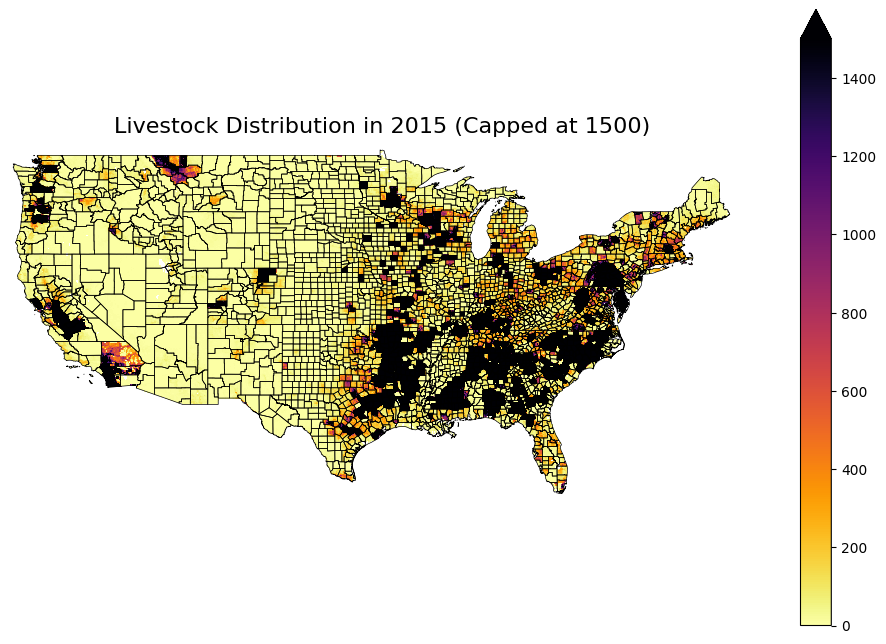

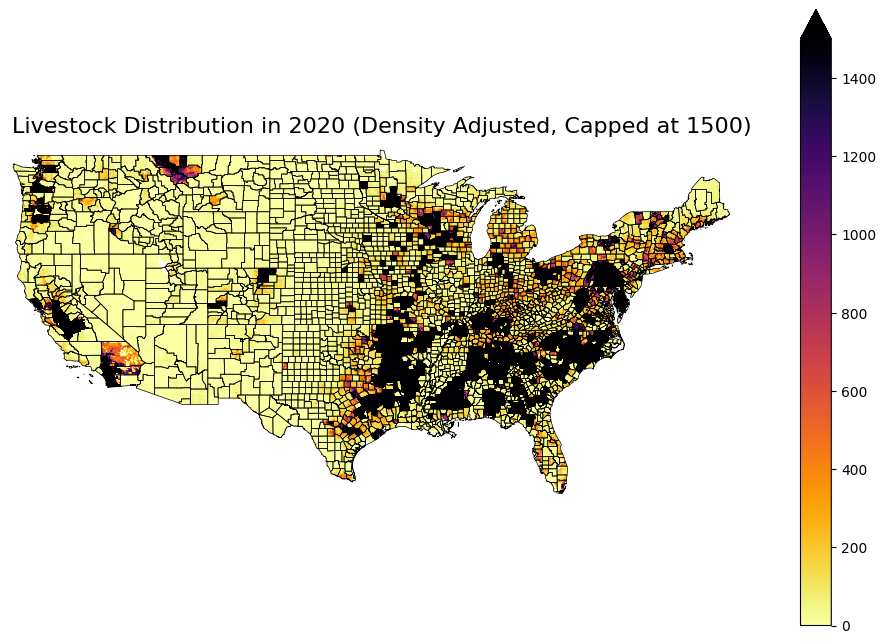

In [ ]:
# Importing necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rxr
from rasterstats import zonal_stats

# List of GeoTIFF files for each year
tif_files = [
    '/content/5_Ch_2010_Da.tif',  # First year GeoTIFF (2010)
    '/content/5_Ch_2015_Da.tif',  # Second year GeoTIFF (2015)
    '/content/GLW4-2020.D-DA.CHK.tif'  # Third year GeoTIFF (2020, Density)
]

# Load the state boundary shapefile
state_boundary_shapefile = '/content/cb_2023_us_county_500k.shp'
state_shape = gpd.read_file(state_boundary_shapefile)

# Reproject the shapefile to match the CRS of the raster if necessary
def reproject_shapefile_to_match_raster(raster, shapefile):
    if shapefile.crs != raster.rio.crs:
        return shapefile.to_crs(raster.rio.crs)
    return shapefile

# Function to clean and plot GeoTIFF data with capped values
def process_and_plot_tiff(tif_file_path, shapefile, nodata_value, vmax, title, xlim=[-125, -65], ylim=[25, 50], is_density=False):
    # Load the raster data and clean it by removing nodata values
    raster_data = rxr.open_rasterio(tif_file_path, masked=True).squeeze()

    # If the data represents density, we calculate the pixel area and multiply by it
    if is_density:
        # Calculate pixel size in degrees (from transform metadata)
        transform = raster_data.rio.transform()
        pixel_width_degrees = abs(transform[0])
        pixel_height_degrees = abs(transform[4])

        # Convert degrees to kilometers (1 degree ~ 111 km)
        pixel_area_sqkm = (pixel_width_degrees * 111) * (pixel_height_degrees * 111)

        # Multiply the raster values (density) by the pixel area to get livestock count
        raster_data = raster_data * pixel_area_sqkm

    # Clip the raster data to the state boundaries
    clipped_raster = raster_data.rio.clip(shapefile.geometry.values, shapefile.crs, drop=True)

    # Plot the clipped raster with zoomed-in boundaries
    f, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size for better clarity

    # Plot the raster data with color bar, capping at vmax
    clipped_raster.plot(cmap="inferno_r", ax=ax, vmin=0, vmax=vmax)

    # Plot the state boundaries on top
    shapefile.boundary.plot(ax=ax, edgecolor="black", linewidth=0.5)

    # Set title and axis limits for zooming
    ax.set_title(title, fontsize=16)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # Remove axis ticks for a cleaner look
    ax.set_axis_off()

    # Show the plot
    plt.show()

# --- Process and Plot for the 2010 GeoTIFF File ---
tif_file_2010 = tif_files[0]
nodata_2010 = -1.7e+308  # Nodata value for the 2010 file

# Reproject shapefile to match the raster CRS (if needed)
state_shape = reproject_shapefile_to_match_raster(rxr.open_rasterio(tif_file_2010, masked=True), state_shape)

# Process and plot the 2010 data
process_and_plot_tiff(
    tif_file_path=tif_file_2010,
    shapefile=state_shape,
    nodata_value=nodata_2010,
    vmax=500,  # Maximum value for 2010
    title="Livestock Distribution in 2010 (Capped at 500)"
)

# --- Process and Plot for the 2015 GeoTIFF File ---
tif_file_2015 = tif_files[1]
nodata_2015 = -3.3999999521443642e+38  # Nodata value for the 2015 file

# Process and plot the 2015 data
process_and_plot_tiff(
    tif_file_path=tif_file_2015,
    shapefile=state_shape,
    nodata_value=nodata_2015,
    vmax=1500,  # Maximum value for 2015
    title="Livestock Distribution in 2015 (Capped at 1500)"
)

# --- Process and Plot for the 2020 GeoTIFF File (Density) ---
tif_file_2020 = tif_files[2]
nodata_2020 = -3.4028234663852886e+38  # Nodata value for the 2020 file

# Process and plot the 2020 data, converting density to count
process_and_plot_tiff(
    tif_file_path=tif_file_2020,
    shapefile=state_shape,
    nodata_value=nodata_2020,
    vmax=1500,  # Maximum value for 2020
    title="Livestock Distribution in 2020 (Density Adjusted, Capped at 1500)",
    is_density=True  # This flag ensures we convert density to livestock count
)


In [ ]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import rioxarray as rxr
from rasterstats import zonal_stats

# List of GeoTIFF files for each year
tif_files = [
    '/content/5_Ch_2010_Da.tif',  # First year GeoTIFF (2010)
    '/content/5_Ch_2015_Da.tif',  # Second year GeoTIFF (2015)
    '/content/GLW4-2020.D-DA.CHK.tif'  # Third year GeoTIFF (2020, Density)
]

# Load the state boundary shapefile
state_boundary_shapefile = '/content/cb_2023_us_county_500k.shp'
state_shape = gpd.read_file(state_boundary_shapefile)

# Function to reproject shapefile to match raster CRS if needed
def reproject_shapefile_to_match_raster(raster, shapefile):
    if shapefile.crs != raster.rio.crs:
        return shapefile.to_crs(raster.rio.crs)
    return shapefile

# Function to clean raster data and calculate zonal stats, then save as CSV
def process_raster_to_csv(tif_file_path, shapefile, nodata_value, year, is_density=False):
    # Load the raster data and clean it by removing nodata values
    raster_data = rxr.open_rasterio(tif_file_path, masked=True).squeeze()

    # Handle density conversion if needed
    if is_density:
        transform = raster_data.rio.transform()
        pixel_width_degrees = abs(transform[0])
        pixel_height_degrees = abs(transform[4])
        pixel_area_sqkm = (pixel_width_degrees * 111) * (pixel_height_degrees * 111)
        raster_data = raster_data * pixel_area_sqkm

    # Reproject the shapefile to match the raster's CRS if necessary
    shapefile = reproject_shapefile_to_match_raster(raster_data, shapefile)

    # Perform zonal statistics
    stats = zonal_stats(
        vectors=shapefile.geometry.values,
        raster=raster_data.values,
        affine=raster_data.rio.transform(),
        stats="sum",
        nodata=nodata_value
    )

    # Create a DataFrame for the stats and save as CSV
    stats_df = pd.DataFrame(stats)
    stats_df['NAME'] = shapefile['NAME']
    stats_df['GEOID'] = shapefile['GEOID']
    stats_df['Year'] = year
    stats_df['Livestock_Count'] = stats_df['sum']

    return stats_df[['NAME', 'GEOID', 'Year', 'Livestock_Count']]

# Generate CSV data for each year
csv_data = pd.DataFrame()

# 2010
stats_2010 = process_raster_to_csv(tif_files[0], state_shape, nodata_value=-1.7e+308, year=2010)
csv_data = pd.concat([csv_data, stats_2010])

# 2015
stats_2015 = process_raster_to_csv(tif_files[1], state_shape, nodata_value=-3.3999999521443642e+38, year=2015)
csv_data = pd.concat([csv_data, stats_2015])

# 2020 (density-adjusted)
stats_2020 = process_raster_to_csv(tif_files[2], state_shape, nodata_value=-3.4028234663852886e+38, year=2020, is_density=True)
csv_data = pd.concat([csv_data, stats_2020])

# Save the results to a CSV file
csv_output_path = '/content/livestock_counts_by_county.csv'
csv_data.to_csv(csv_output_path, index=False)
print(f"CSV file has been saved at: {csv_output_path}")


CSV file has been saved at: /content/livestock_counts_by_county.csv


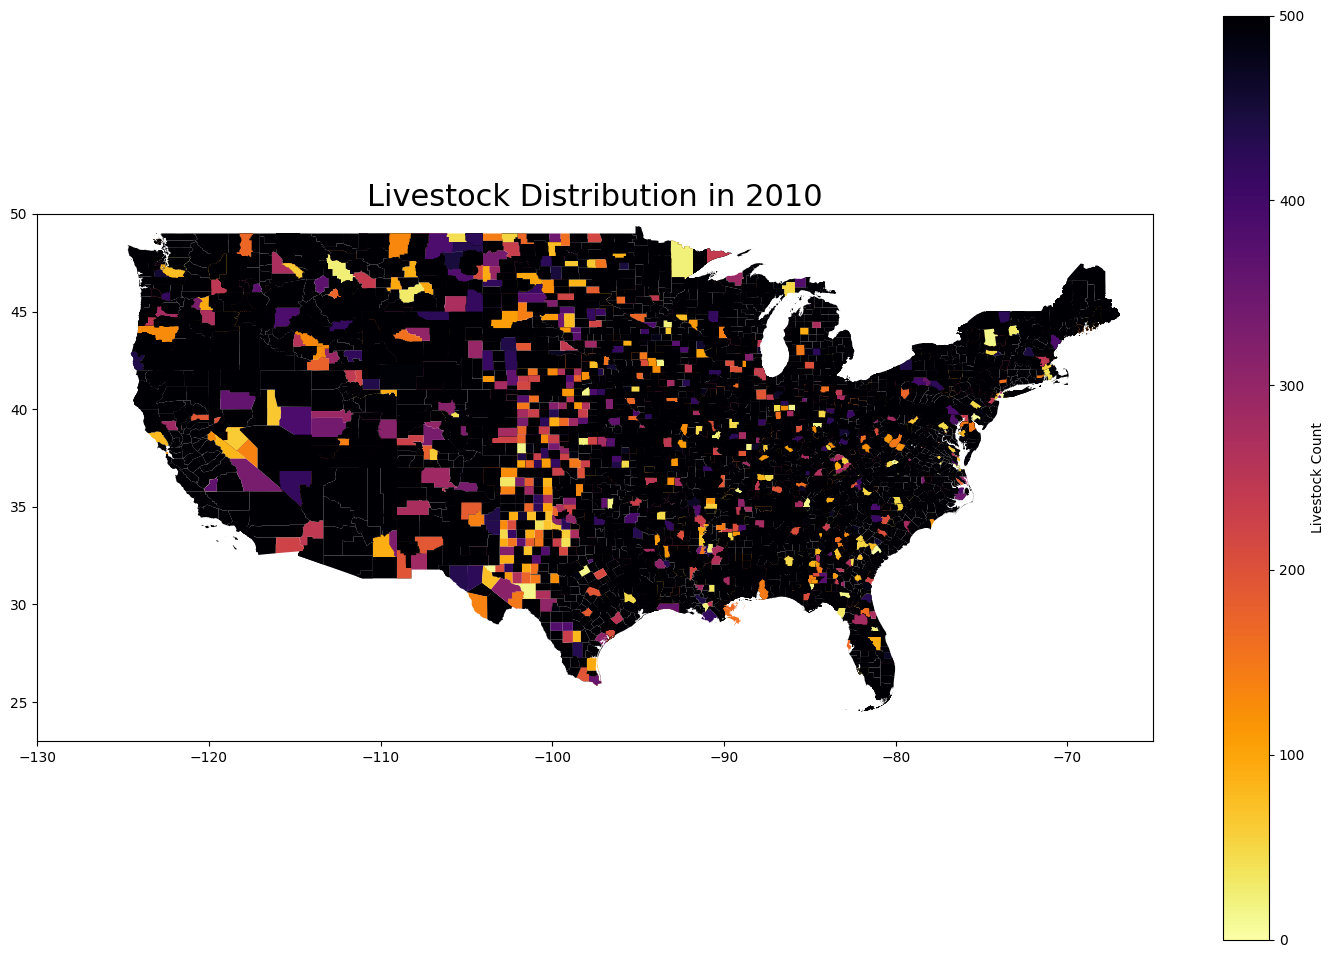

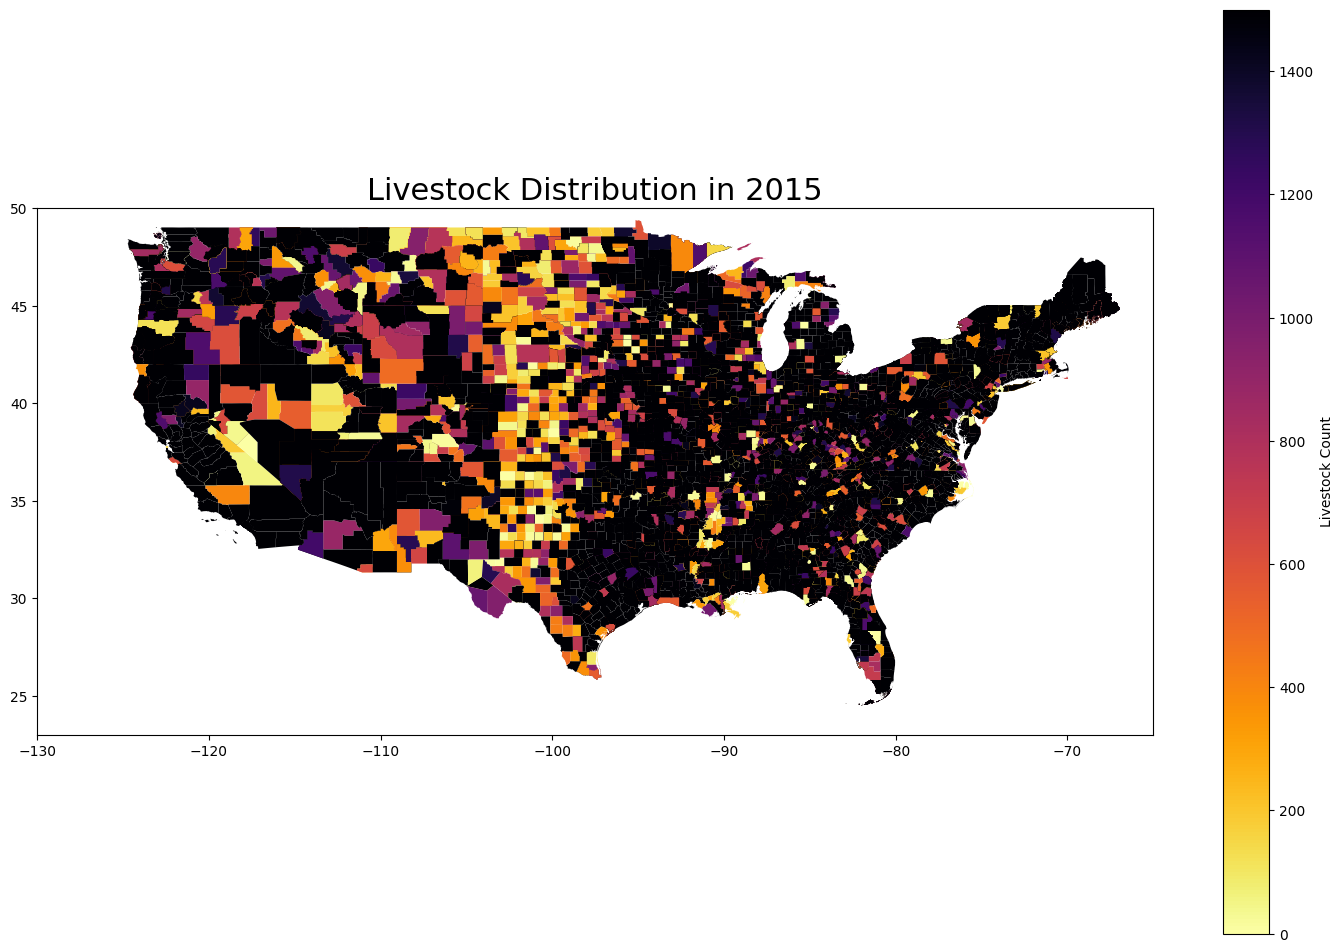

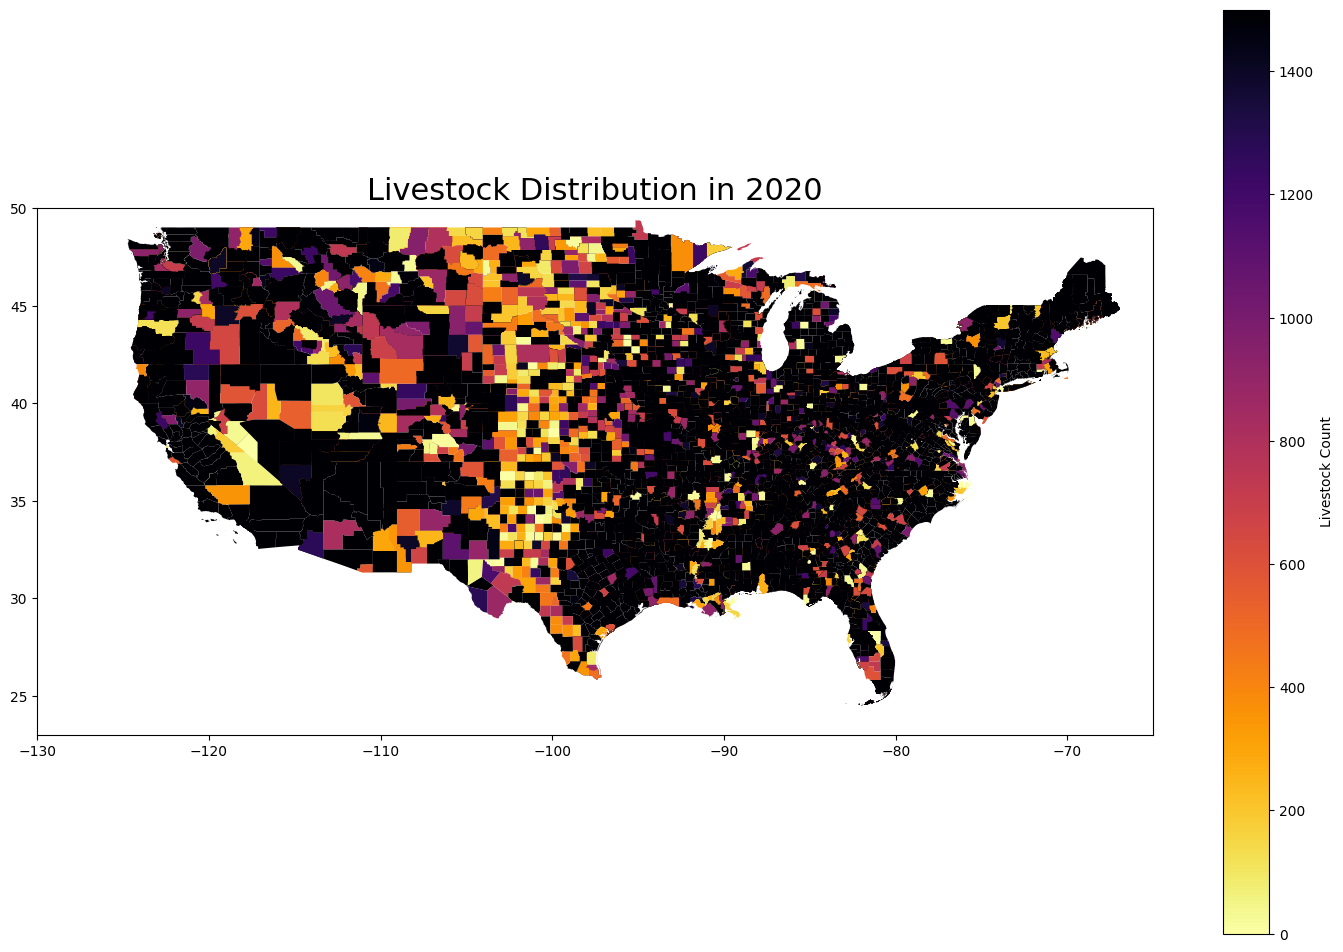

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the county boundary shapefile
state_boundary_shapefile = '/content/cb_2023_us_county_500k.shp'
state_shape = gpd.read_file(state_boundary_shapefile)

# Load the CSV file containing the livestock counts
csv_file_path = '/content/livestock_counts_by_county.csv'
livestock_data = pd.read_csv(csv_file_path)

# Function to plot the livestock data for a given year with axis limits for zoom
def plot_livestock_from_csv(livestock_data, year, vmax=500, xlim=(-130, -65), ylim=(23, 50)):
    # Filter the data for the given year
    year_data = livestock_data[livestock_data['Year'] == year]

    # Merge with the shapefile
    merged_data = state_shape.merge(year_data, on="NAME")

    # Plot the data with a larger figure size
    fig, ax = plt.subplots(1, 1, figsize=(18, 12))  # Increased figure size
    merged_data.plot(column='Livestock_Count', ax=ax, cmap='inferno_r', legend=True,
                     vmin=0, vmax=vmax, legend_kwds={'label': "Livestock Count", 'orientation': "vertical"})

    # Add title
    ax.set_title(f'Livestock Distribution in {year}', fontsize=22)

    # Set x and y axis limits to zoom into the U.S. mainland
    ax.set_xlim(xlim)  # Set the longitude limits
    ax.set_ylim(ylim)  # Set the latitude limits

    # Show the plot
    plt.show()

# Plot data for 2010 (adjust vmax as necessary for better visibility)
plot_livestock_from_csv(livestock_data, 2010, vmax=500, xlim=(-130, -65), ylim=(23, 50))

# Plot data for 2015 (adjust vmax for consistency)
plot_livestock_from_csv(livestock_data, 2015, vmax=1500, xlim=(-130, -65), ylim=(23, 50))

# Plot data for 2020 (adjust vmax for consistency)
plot_livestock_from_csv(livestock_data, 2020, vmax=1500, xlim=(-130, -65), ylim=(23, 50))


In [ ]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import rioxarray as rxr

# Load the raster and shapefile paths
tif_files = [
    '/content/5_Ch_2010_Da.tif',  # 2010 GeoTIFF
    '/content/5_Ch_2015_Da.tif',  # 2015 GeoTIFF
    '/content/GLW4-2020.D-DA.CHK.tif'  # 2020 GeoTIFF (density)
]

# Load the county boundary shapefile
state_boundary_shapefile = '/content/cb_2023_us_county_500k.shp'
state_shape = gpd.read_file(state_boundary_shapefile)

# Function to directly extract and store pixel values in the CSV
def extract_raster_to_csv(tif_file_path, year, is_density=False):
    # Load the raster data
    raster_data = rxr.open_rasterio(tif_file_path, masked=True).squeeze()

    # Handle density conversion if necessary (for 2020)
    if is_density:
        # Calculate pixel area in sqkm and adjust
        transform = raster_data.rio.transform()
        pixel_width_degrees = abs(transform[0])
        pixel_height_degrees = abs(transform[4])
        pixel_area_sqkm = (pixel_width_degrees * 111) * (pixel_height_degrees * 111)
        raster_data = raster_data * pixel_area_sqkm

    # Reproject the shapefile to match the raster's CRS
    if state_shape.crs != raster_data.rio.crs:
        state_shape_reprojected = state_shape.to_crs(raster_data.rio.crs)
    else:
        state_shape_reprojected = state_shape

    # Perform pixel-based masking
    clipped_raster = raster_data.rio.clip(state_shape_reprojected.geometry, state_shape_reprojected.crs, drop=True)

    # Get bounding box (left, bottom, right, top) from tuple
    bounds = clipped_raster.rio.bounds()
    left, bottom, right, top = bounds  # This fixes the AttributeError

    # Flatten raster data and create a DataFrame for CSV
    coords = np.meshgrid(
        np.linspace(left, right, clipped_raster.shape[1]),
        np.linspace(top, bottom, clipped_raster.shape[0])
    )
    lat, lon = coords[1].flatten(), coords[0].flatten()
    pixel_values = clipped_raster.values.flatten()

    # Create a DataFrame and store pixel-level data
    raster_df = pd.DataFrame({'Latitude': lat, 'Longitude': lon, 'Pixel_Value': pixel_values})
    raster_df['Year'] = year
    raster_df['Livestock_Type'] = "Chicken"  # Assuming we are doing this for Chicken

    # Save the DataFrame to CSV
    csv_output_path = f'/content/livestock_pixels_{year}.csv'
    raster_df.to_csv(csv_output_path, index=False)
    print(f"Data saved to {csv_output_path}")

# Extract data for 2010, 2015, and 2020 into separate CSV files
extract_raster_to_csv(tif_files[0], year=2010)
extract_raster_to_csv(tif_files[1], year=2015)
extract_raster_to_csv(tif_files[2], year=2020, is_density=True)


Data saved to /content/livestock_pixels_2010.csv
Data saved to /content/livestock_pixels_2015.csv
Data saved to /content/livestock_pixels_2020.csv


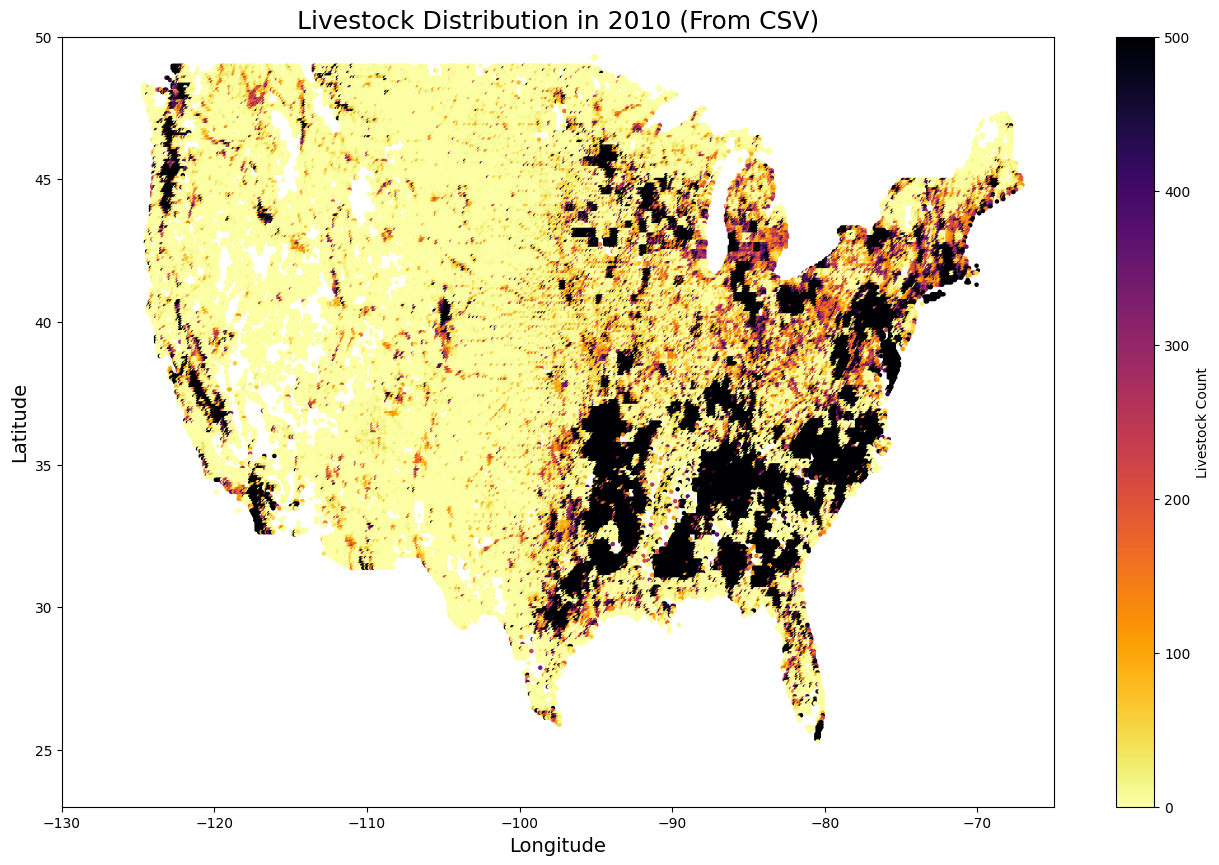

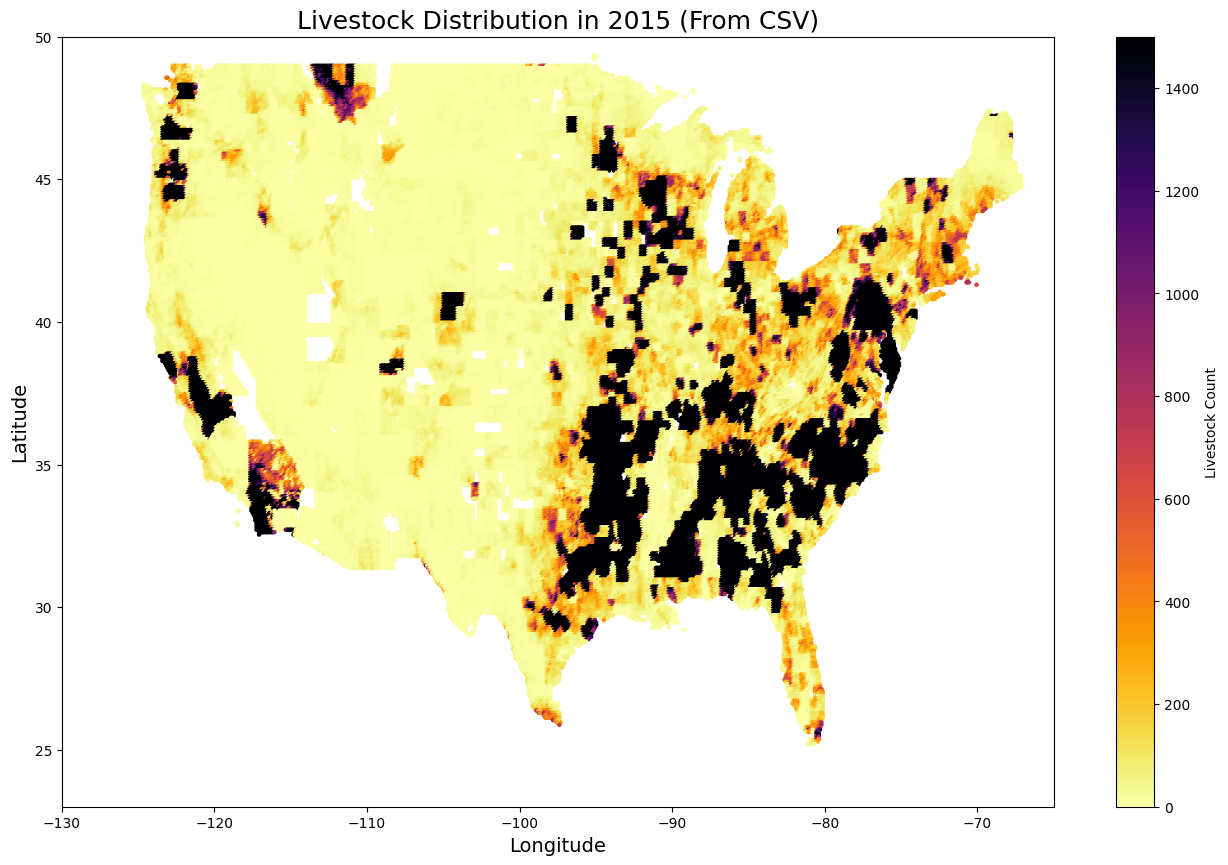

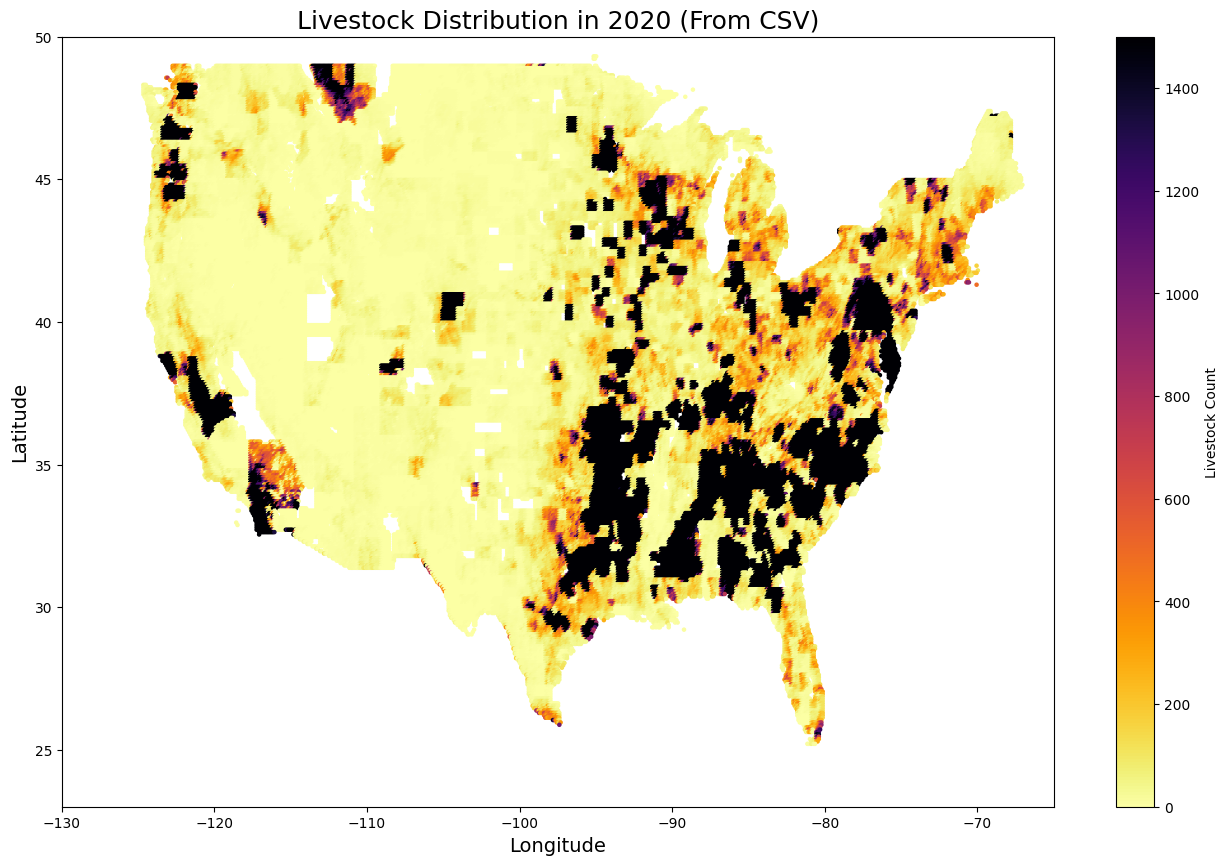

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file generated from the raster extraction
csv_file_path_2010 = '/content/livestock_pixels_2010.csv'
csv_file_path_2015 = '/content/livestock_pixels_2015.csv'
csv_file_path_2020 = '/content/livestock_pixels_2020.csv'

# Function to plot CSV data
def plot_csv_data(csv_file_path, title, vmax=1500, xlim=(-130, -65), ylim=(23, 50)):
    # Load the CSV data
    livestock_data = pd.read_csv(csv_file_path)

    # Filter out NaN or zero values for better visualization (optional)
    livestock_data = livestock_data[livestock_data['Pixel_Value'] > 0]

    # Create the scatter plot with latitude and longitude
    plt.figure(figsize=(16, 10))  # Set a large figure size
    sc = plt.scatter(
        livestock_data['Longitude'], livestock_data['Latitude'],
        c=livestock_data['Pixel_Value'], cmap='inferno_r', s=5,
        vmin=0, vmax=vmax
    )

    # Add a color bar
    cbar = plt.colorbar(sc)
    cbar.set_label('Livestock Count')

    # Set plot title and axis labels
    plt.title(title, fontsize=18)
    plt.xlabel('Longitude', fontsize=14)
    plt.ylabel('Latitude', fontsize=14)

    # Set x and y limits to zoom into the U.S. mainland
    plt.xlim(xlim)
    plt.ylim(ylim)

    # Show the plot
    plt.show()

# Plot the CSV data for 2010
plot_csv_data(csv_file_path_2010, 'Livestock Distribution in 2010 (From CSV)', vmax=500, xlim=(-130, -65), ylim=(23, 50))

# Plot the CSV data for 2015
plot_csv_data(csv_file_path_2015, 'Livestock Distribution in 2015 (From CSV)', vmax=1500, xlim=(-130, -65), ylim=(23, 50))

# Plot the CSV data for 2020
plot_csv_data(csv_file_path_2020, 'Livestock Distribution in 2020 (From CSV)', vmax=1500, xlim=(-130, -65), ylim=(23, 50))


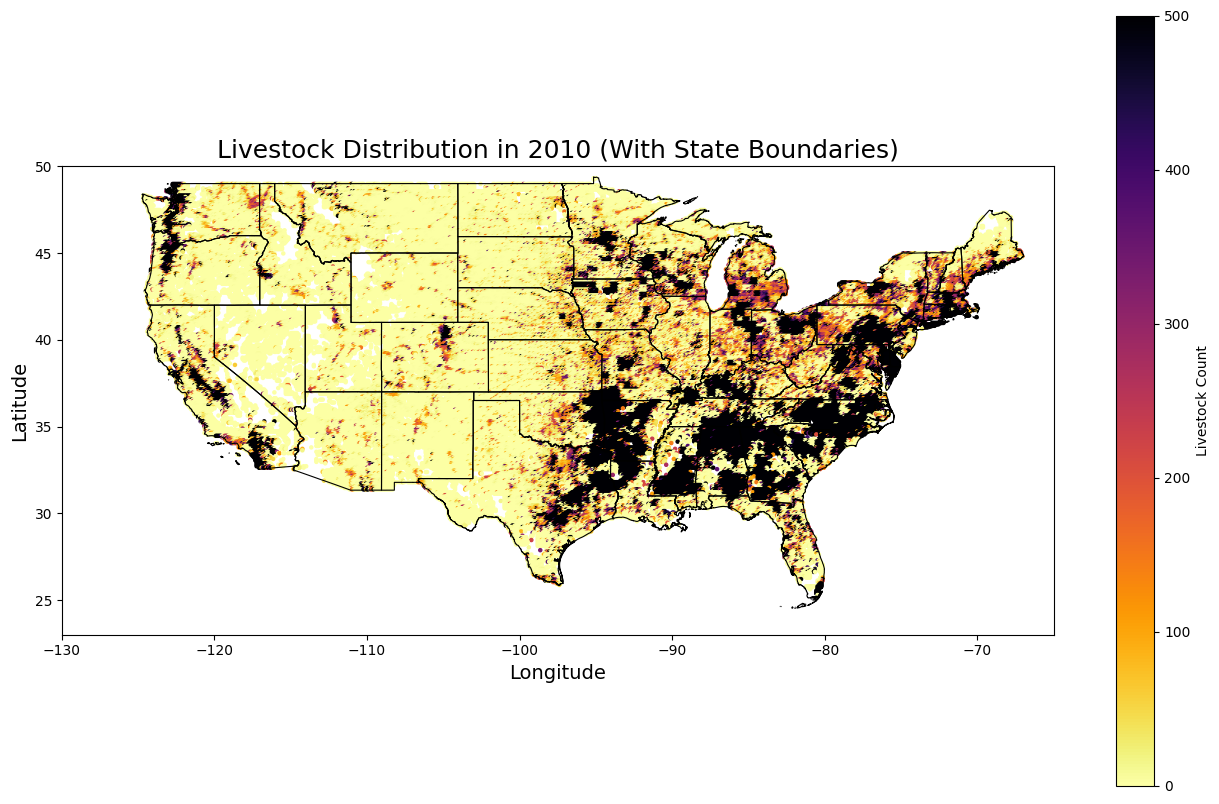

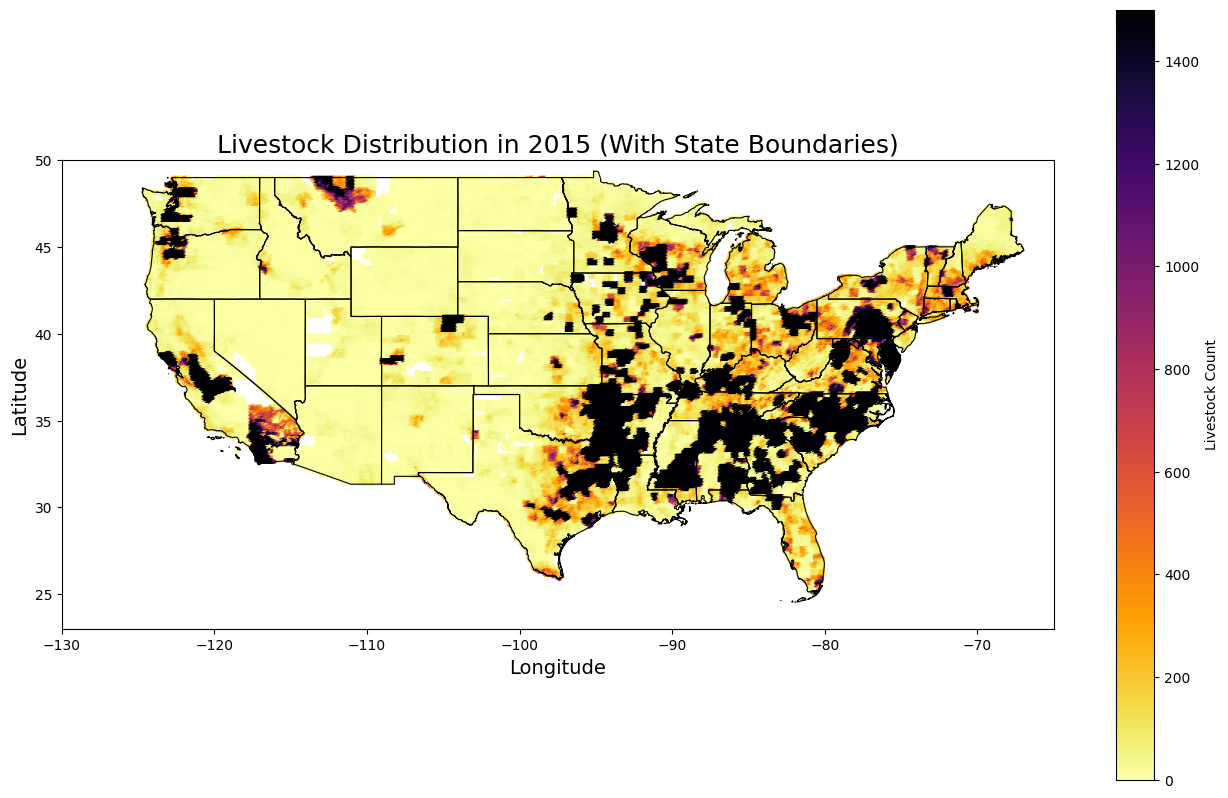

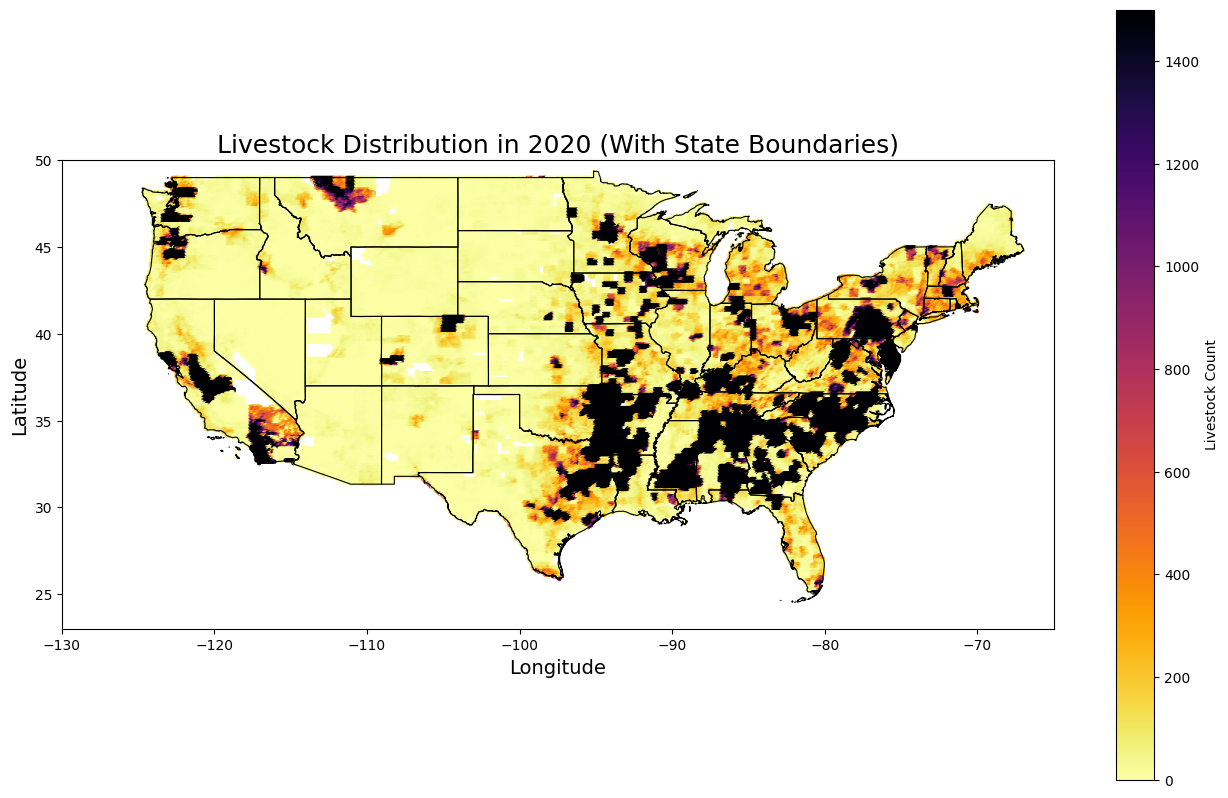

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the CSV file generated from the raster extraction
csv_file_path_2010 = '/content/livestock_pixels_2010.csv'
csv_file_path_2015 = '/content/livestock_pixels_2015.csv'
csv_file_path_2020 = '/content/livestock_pixels_2020.csv'

# Load the state boundary shapefile
state_boundary_shapefile = '/content/cb_2023_us_state_500k.shp'
state_shape = gpd.read_file(state_boundary_shapefile)

# Function to plot CSV data with state boundaries overlaid
def plot_csv_data_with_state_mask(csv_file_path, title, vmax=1500, xlim=(-130, -65), ylim=(23, 50)):
    # Load the CSV data
    livestock_data = pd.read_csv(csv_file_path)

    # Filter out NaN or zero values for better visualization (optional)
    livestock_data = livestock_data[livestock_data['Pixel_Value'] > 0]

    # Create the scatter plot with latitude and longitude
    fig, ax = plt.subplots(figsize=(16, 10))  # Set a large figure size
    sc = ax.scatter(
        livestock_data['Longitude'], livestock_data['Latitude'],
        c=livestock_data['Pixel_Value'], cmap='inferno_r', s=5,
        vmin=0, vmax=vmax
    )

    # Add the state boundaries from the shapefile
    state_shape.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

    # Add a color bar
    cbar = plt.colorbar(sc)
    cbar.set_label('Livestock Count')

    # Set plot title and axis labels
    plt.title(title, fontsize=18)
    plt.xlabel('Longitude', fontsize=14)
    plt.ylabel('Latitude', fontsize=14)

    # Set x and y limits to zoom into the U.S. mainland
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # Show the plot
    plt.show()

# Plot the CSV data for 2010 with state boundaries
plot_csv_data_with_state_mask(csv_file_path_2010, 'Livestock Distribution in 2010 (With State Boundaries)', vmax=500, xlim=(-130, -65), ylim=(23, 50))

# Plot the CSV data for 2015 with state boundaries
plot_csv_data_with_state_mask(csv_file_path_2015, 'Livestock Distribution in 2015 (With State Boundaries)', vmax=1500, xlim=(-130, -65), ylim=(23, 50))

# Plot the CSV data for 2020 with state boundaries
plot_csv_data_with_state_mask(csv_file_path_2020, 'Livestock Distribution in 2020 (With State Boundaries)', vmax=1500, xlim=(-130, -65), ylim=(23, 50))


In [ ]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterstats import zonal_stats
from shapely.geometry import box

# Define the paths for the GeoTIFF files for 2010, 2015, and 2020
tif_files_2010 = [
    '/content/5_Bf_2010_Da.tif', '/content/5_Ch_2010_Da.tif',
    '/content/5_Ct_2010_Da.tif', '/content/5_Dk_2010_Da.tif',
    '/content/5_Gt_2010_Da.tif', '/content/5_Ho_2010_Da.tif',
    '/content/5_Pg_2010_Da.tif', '/content/5_Sh_2010_Da.tif'
]

tif_files_2015 = [
    '/content/5_Bf_2015_Da.tif', '/content/5_Ch_2015_Da.tif',
    '/content/5_Ct_2015_Da.tif', '/content/5_Dk_2015_Da.tif',
    '/content/5_Gt_2015_Da.tif', '/content/5_Ho_2015_Da.tif',
    '/content/5_Pg_2015_Da.tif', '/content/5_Sh_2015_Da.tif'
]

tif_files_2020 = [
    '/content/GLW4-2020.D-DA.BFL.tif', '/content/GLW4-2020.D-DA.CHK.tif',
    '/content/GLW4-2020.D-DA.CTL.tif', '/content/GLW4-2020.D-DA.GTS.tif',
    '/content/GLW4-2020.D-DA.PGS.tif', '/content/GLW4-2020.D-DA.SHP.tif'
]

# Load the state boundary shapefile
state_boundary_shapefile = '/content/cb_2023_us_state_500k.shp'
state_shape = gpd.read_file(state_boundary_shapefile)

# Reproject the state shapefile to the correct CRS if necessary
def reproject_raster_to_match_shapefile(tif_file, shapefile_crs):
    with rasterio.open(tif_file) as src:
        if src.crs != shapefile_crs:
            transform, width, height = calculate_default_transform(
                src.crs, shapefile_crs, src.width, src.height, *src.bounds)
            kwargs = src.meta.copy()
            kwargs.update({
                'crs': shapefile_crs,
                'transform': transform,
                'width': width,
                'height': height
            })

            # Output file path for the reprojected raster
            reprojected_file = tif_file.replace('.tif', '_reprojected.tif')

            with rasterio.open(reprojected_file, 'w', **kwargs) as dst:
                for i in range(1, src.count + 1):
                    reproject(
                        source=rasterio.band(src, i),
                        destination=rasterio.band(dst, i),
                        src_transform=src.transform,
                        src_crs=src.crs,
                        dst_transform=transform,
                        dst_crs=shapefile_crs,
                        resampling=Resampling.nearest
                    )
            return reprojected_file
        else:
            return tif_file

# Function to calculate pixel area in square kilometers
def calculate_pixel_area(raster_transform):
    pixel_width_degrees = abs(raster_transform[0])
    pixel_height_degrees = abs(raster_transform[4])
    pixel_area_sqkm = (pixel_width_degrees * 111) * (pixel_height_degrees * 111)
    return pixel_area_sqkm

# Function to extract livestock type from file name
def get_livestock_type(file_name):
    livestock_map = {
        'Ch': 'Chicken',
        'Pg': 'Pig',
        'Ct': 'Cattle',
        'Bf': 'Buffalo',
        'Dk': 'Duck',
        'Gt': 'Goat',
        'Ho': 'Horse',
        'Sh': 'Sheep',
        'BFL': 'Buffalo',
        'CHK': 'Chicken',
        'CTL': 'Cattle',
        'GTS': 'Goat',
        'PGS': 'Pig',
        'SHP': 'Sheep'
    }

    # Extract livestock type from the filename
    for code, name in livestock_map.items():
        if code in file_name:
            return name
    return "Unknown"

# Function to process each GeoTIFF and get the zonal statistics (livestock counts) for each state
def process_tif_and_get_stats(tif_file, year, shapefile, is_density=False):
    # Reproject the raster to match the CRS of the shapefile
    tif_file_reprojected = reproject_raster_to_match_shapefile(tif_file, shapefile.crs)

    # Load the raster data
    with rasterio.open(tif_file_reprojected) as src:
        raster_data = src.read(1, masked=True)  # Read the first band and mask NoData values
        nodata_value = src.nodata

        # Handle density conversion if necessary (for 2020 data)
        if is_density:
            pixel_area_sqkm = calculate_pixel_area(src.transform)
            raster_data = raster_data * pixel_area_sqkm

        # Perform zonal statistics
        stats = zonal_stats(
            vectors=shapefile.geometry,
            raster=raster_data,
            affine=src.transform,
            stats="sum",
            nodata=nodata_value  # Ensure nodata values are excluded
        )

    # Create a DataFrame to store the results
    stats_df = pd.DataFrame(stats)

    # Get the livestock type from the file name
    livestock_type = get_livestock_type(tif_file)

    # Add state name, GEOID, livestock type, and year to the data
    shapefile["Livestock_Type"] = livestock_type
    shapefile["Year"] = year
    shapefile["Livestock_Count"] = stats_df["sum"].replace([-np.inf, np.nan], 0)  # Replace -inf and NaN with 0

    return shapefile[["NAME", "GEOID", "Livestock_Type", "Year", "Livestock_Count"]]

# Combine data from all years into a single DataFrame
all_data = pd.DataFrame()

# Process 2010 files
for tif_file in tif_files_2010:
    stats_2010 = process_tif_and_get_stats(tif_file, year=2010, shapefile=state_shape, is_density=False)
    all_data = pd.concat([all_data, stats_2010])

# Process 2015 files
for tif_file in tif_files_2015:
    stats_2015 = process_tif_and_get_stats(tif_file, year=2015, shapefile=state_shape, is_density=False)
    all_data = pd.concat([all_data, stats_2015])

# Process 2020 files (density-adjusted)
for tif_file in tif_files_2020:
    stats_2020 = process_tif_and_get_stats(tif_file, year=2020, shapefile=state_shape, is_density=True)
    all_data = pd.concat([all_data, stats_2020])

# Save the combined data to a CSV file
csv_output_path = '/content/livestock_counts_by_state.csv'
all_data.to_csv(csv_output_path, index=False)

print(f"Data has been saved to {csv_output_path}")


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


Data has been saved to /content/livestock_counts_by_state.csv


In [ ]:
all_data.head()


NAME GEOID Livestock_Type  Year  Livestock_Count
0    New Mexico    35        Buffalo  2010     60390.618567
1  South Dakota    46        Buffalo  2010     26010.456716
2    California    06        Buffalo  2010     75771.539260
3      Kentucky    21        Buffalo  2010      7863.868927
4       Alabama    01        Buffalo  2010     45103.836641

Common Functions: The common functions (like calculating pixel area, reprojecting raster, etc.) will be reused for all three pipelines.
Separate Pipelines: Each of the pipelines (state, county, zip) will be handled separately so you can run them individually.
Checkpoints: We'll ensure that density calculation (for 2020), coordinate matching, and handling of no-data values are handled in each pipeline.


Key Points:
Common functions handle the reprojecting, pixel area calculation, and livestock type extraction.
Separate pipelines are created for state, county, and zip levels.
Ensure CRS: The reprojecting is done for each raster to match the shapefiles' CRS.
Handling Density for 2020: Density calculations are handled appropriately for the 2020 files by multiplying by pixel area.
NoData Handling: Nodata values are handled by masking them and excluding them from the calculations.

In [ ]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterstats import zonal_stats

# Reproject the raster to match the CRS of the shapefile
def reproject_raster_to_match_shapefile(tif_file, shapefile_crs):
    with rasterio.open(tif_file) as src:
        if src.crs != shapefile_crs:
            transform, width, height = calculate_default_transform(
                src.crs, shapefile_crs, src.width, src.height, *src.bounds)
            kwargs = src.meta.copy()
            kwargs.update({
                'crs': shapefile_crs,
                'transform': transform,
                'width': width,
                'height': height
            })

            reprojected_file = tif_file.replace('.tif', '_reprojected.tif')

            with rasterio.open(reprojected_file, 'w', **kwargs) as dst:
                for i in range(1, src.count + 1):
                    reproject(
                        source=rasterio.band(src, i),
                        destination=rasterio.band(dst, i),
                        src_transform=src.transform,
                        src_crs=src.crs,
                        dst_transform=transform,
                        dst_crs=shapefile_crs,
                        resampling=Resampling.nearest
                    )
            return reprojected_file
        else:
            return tif_file

# Calculate pixel area in square kilometers for density calculation
def calculate_pixel_area(raster_transform):
    pixel_width_degrees = abs(raster_transform[0])
    pixel_height_degrees = abs(raster_transform[4])
    pixel_area_sqkm = (pixel_width_degrees * 111) * (pixel_height_degrees * 111)
    return pixel_area_sqkm

# Extract livestock type from filename
def get_livestock_type(file_name):
    livestock_map = {
        'Ch': 'Chicken',
        'Pg': 'Pig',
        'Ct': 'Cattle',
        'Bf': 'Buffalo',
        'Dk': 'Duck',
        'Gt': 'Goat',
        'Ho': 'Horse',
        'Sh': 'Sheep',
        'BFL': 'Buffalo',
        'CHK': 'Chicken',
        'CTL': 'Cattle',
        'GTS': 'Goat',
        'PGS': 'Pig',
        'SHP': 'Sheep'
    }

    for code, name in livestock_map.items():
        if code in file_name:
            return name
    return "Unknown"

# Process GeoTIFF files to get zonal statistics for a specific level
def process_tif_and_get_stats(tif_file, year, shapefile, level, is_density=False):
    tif_file_reprojected = reproject_raster_to_match_shapefile(tif_file, shapefile.crs)

    with rasterio.open(tif_file_reprojected) as src:
        raster_data = src.read(1, masked=True)
        nodata_value = src.nodata

        if is_density:
            pixel_area_sqkm = calculate_pixel_area(src.transform)
            raster_data = raster_data * pixel_area_sqkm

        stats = zonal_stats(
            vectors=shapefile.geometry,
            raster=raster_data,
            affine=src.transform,
            stats="sum",
            nodata=nodata_value
        )

    stats_df = pd.DataFrame(stats)
    livestock_type = get_livestock_type(tif_file)

    shapefile["Livestock_Type"] = livestock_type
    shapefile["Year"] = year
    shapefile["Livestock_Count"] = stats_df["sum"].replace([-np.inf, np.nan], 0)

    if level == 'state':
        return shapefile[["NAME", "GEOID", "Livestock_Type", "Year", "Livestock_Count"]]
    elif level == 'county':
        return shapefile[["NAME", "GEOID", "Livestock_Type", "Year", "Livestock_Count"]]
    elif level == 'zip':
        return shapefile[["ZCTA5CE20", "GEOID20", "Livestock_Type", "Year", "Livestock_Count"]]


In [ ]:
# Function for state-level processing
def process_state_level(tif_files_2010, tif_files_2015, tif_files_2020, state_shape):
    all_data_state = pd.DataFrame()

    for tif_file in tif_files_2010:
        stats_2010_state = process_tif_and_get_stats(tif_file, year=2010, shapefile=state_shape, level='state', is_density=False)
        all_data_state = pd.concat([all_data_state, stats_2010_state])

    for tif_file in tif_files_2015:
        stats_2015_state = process_tif_and_get_stats(tif_file, year=2015, shapefile=state_shape, level='state', is_density=False)
        all_data_state = pd.concat([all_data_state, stats_2015_state])

    for tif_file in tif_files_2020:
        stats_2020_state = process_tif_and_get_stats(tif_file, year=2020, shapefile=state_shape, level='state', is_density=True)
        all_data_state = pd.concat([all_data_state, stats_2020_state])

    all_data_state.to_csv('/content/livestock_counts_by_state.csv', index=False)
    print("State-level CSV generated!")


In [ ]:
# Function for county-level processing
def process_county_level(tif_files_2010, tif_files_2015, tif_files_2020, county_shape):
    all_data_county = pd.DataFrame()

    for tif_file in tif_files_2010:
        stats_2010_county = process_tif_and_get_stats(tif_file, year=2010, shapefile=county_shape, level='county', is_density=False)
        all_data_county = pd.concat([all_data_county, stats_2010_county])

    for tif_file in tif_files_2015:
        stats_2015_county = process_tif_and_get_stats(tif_file, year=2015, shapefile=county_shape, level='county', is_density=False)
        all_data_county = pd.concat([all_data_county, stats_2015_county])

    for tif_file in tif_files_2020:
        stats_2020_county = process_tif_and_get_stats(tif_file, year=2020, shapefile=county_shape, level='county', is_density=True)
        all_data_county = pd.concat([all_data_county, stats_2020_county])

    all_data_county.to_csv('/content/livestock_counts_by_county.csv', index=False)
    print("County-level CSV generated!")


In [ ]:
# Function for zip code-level processing
def process_zip_level(tif_files_2010, tif_files_2015, tif_files_2020, zipcode_shape):
    all_data_zip = pd.DataFrame()

    for tif_file in tif_files_2010:
        stats_2010_zip = process_tif_and_get_stats(tif_file, year=2010, shapefile=zipcode_shape, level='zip', is_density=False)
        all_data_zip = pd.concat([all_data_zip, stats_2010_zip])

    for tif_file in tif_files_2015:
        stats_2015_zip = process_tif_and_get_stats(tif_file, year=2015, shapefile=zipcode_shape, level='zip', is_density=False)
        all_data_zip = pd.concat([all_data_zip, stats_2015_zip])

    for tif_file in tif_files_2020:
        stats_2020_zip = process_tif_and_get_stats(tif_file, year=2020, shapefile=zipcode_shape, level='zip', is_density=True)
        all_data_zip = pd.concat([all_data_zip, stats_2020_zip])

    all_data_zip.to_csv('/content/livestock_counts_by_zip.csv', index=False)
    print("Zip code-level CSV generated!")


In [ ]:
# Define your shapefiles and run each level pipeline separately
state_boundary_shapefile = '/content/cb_2023_us_state_500k.shp'
county_boundary_shapefile = '/content/cb_2023_us_county_500k.shp'
zipcode_boundary_shapefile = '/content/tl_2020_us_zcta520.shp'

state_shape = gpd.read_file(state_boundary_shapefile)
county_shape = gpd.read_file(county_boundary_shapefile)
zipcode_shape = gpd.read_file(zipcode_boundary_shapefile)

# Process state-level
process_state_level(tif_files_2010, tif_files_2015, tif_files_2020, state_shape)

# Process county-level
process_county_level(tif_files_2010, tif_files_2015, tif_files_2020, county_shape)

# Process zip code-level
process_zip_level(tif_files_2010, tif_files_2015, tif_files_2020, zipcode_shape)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


State-level CSV generated!


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


County-level CSV generated!


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


Zip code-level CSV generated!


1. State-Level Livestock Data (Already Done)
This is already implemented and working, but we can ensure it is correctly handling the livestock types, NoData values, and density adjustments.

2. County-Level Livestock Data
We can reuse the same process as the state-level, but this time, we will apply it to the county boundary shapefile.

3. Zip Code Level Livestock Data
Similarly, we will use the zip code boundary shapefile to aggregate livestock counts at the zip code level.

Key Adjustments for CSV:
Include GEOID for unique identification at all levels (state, county, and zip code).
Ensure accurate handling of 2020 density data by multiplying pixel values by area.
Correct CRS handling to match shapefiles with the raster data.


Reprojection: Ensures that the raster and shapefiles are in the same CRS before processing.
Density Adjustment for 2020: Handles the conversion of density data to counts.
CSV Output: Saves separate CSV files for state, county, and zip code level data with the proper livestock types and counts.

In [ ]:
# Load the state shapefile and inspect columns
state_shape = gpd.read_file('/content/cb_2023_us_state_500k.shp')  # Replace with your actual path
print("State Shapefile Columns:", state_shape.columns)

# Load the CSV file and inspect columns
livestock_data = pd.read_csv('/content/livestock_counts_by_state.csv')  # Replace with the correct path
print("CSV Columns:", livestock_data.columns)


State Shapefile Columns: Index(['STATEFP', 'STATENS', 'GEOIDFQ', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')
CSV Columns: Index(['NAME', 'Livestock_Type', 'Year', 'Livestock_Count'], dtype='object')


In [ ]:
import geopandas as gpd

# Load the state boundary shapefile
state_boundary_shapefile = '/content/cb_2023_us_county_500k.shp'
state_shape = gpd.read_file(state_boundary_shapefile)

# Inspect shapefile CRS, bounds, and first few rows
print("CRS of the shapefile:", state_shape.crs)
print("Bounds of the shapefile:", state_shape.bounds)
print("First few rows of the shapefile data:")
print(state_shape.head())

# Check the structure and column names of the shapefile
print("Shapefile columns:", state_shape.columns)


CRS of the shapefile: EPSG:4269
Bounds of the shapefile:            minx       miny       maxx       maxy
0    -88.028580  30.223334 -87.366591  31.319017
1    -85.712409  30.997083 -84.999428  31.314973
2    -85.748251  31.617747 -85.049310  32.148251
3    -88.421453  32.307665 -87.840889  32.995860
4    -94.043432  33.019139 -93.664921  33.613978
...         ...        ...        ...        ...
3230 -97.487065  33.416410 -96.943346  33.956378
3231 -88.702391  38.255319 -88.147752  38.607309
3232 -67.169518  18.386090 -67.056404  18.513352
3233 -66.264323  18.389289 -66.134534  18.475641
3234 -66.320913  18.075884 -66.216464  18.180349

[3235 rows x 4 columns]
First few rows of the shapefile data:
  STATEFP COUNTYFP  COUNTYNS         GEOIDFQ  GEOID     NAME        NAMELSAD  \
0      01      003  00161527  0500000US01003  01003  Baldwin  Baldwin County   
1      01      069  00161560  0500000US01069  01069  Houston  Houston County   
2      01      005  00161528  0500000US01005  01005 

Extract pixel data: We'll extract pixel-level data (latitude, longitude, pixel values) for each of the years 2010, 2015, and 2020.
Handle density data: For 2020, we'll handle the conversion from density to count using the pixel area.
Aggregate the data: We'll combine the data for all years and livestock types into a single DataFrame, with each livestock type and year as a separate column.
Final CSV output: The final CSV will contain latitude, longitude, and pixel values for different livestock types across the three years.


Key Points in the Code:
Handling Multiple Livestock Types: The tif_files dictionary contains entries for multiple livestock types (e.g., Chicken, Pig, Cattle), with their respective GeoTIFF files for 2010, 2015, and 2020.

Density Handling for 2020: The extract_raster_data function takes care of handling density adjustments for 2020 data by multiplying the pixel values by the pixel area in square kilometers.

Coordinate Matching Across Years: The latitude and longitude values are used to merge data across different years and livestock types, ensuring that the final CSV contains all relevant data for each geographic coordinate.

Aggregated Output: The final CSV contains the coordinates (latitude and longitude) and pixel values for all livestock types across the three years. Each column in the CSV corresponds to a specific livestock type and year (e.g., Chicken_2010, Pig_2020).

In [ ]:
! pip install rioxarray

import os
import numpy as np
import pandas as pd
import rioxarray as rxr

# Define the livestock mapping for 2010, 2015, and 2020 files
tif_files = {
    'Buffalo': {
        2010: '/content/5_Bf_2010_Da.tif',
        2015: '/content/5_Bf_2015_Da.tif',
        2020: '/content/GLW4-2020.D-DA.BFL.tif'
    },
    'Chicken': {
        2010: '/content/5_Ch_2010_Da.tif',
        2015: '/content/5_Ch_2015_Da.tif',
        2020: '/content/GLW4-2020.D-DA.CHK.tif'
    },
    'Cattle': {
        2010: '/content/5_Ct_2010_Da.tif',
        2015: '/content/5_Ct_2015_Da.tif',
        2020: '/content/GLW4-2020.D-DA.CTL.tif'
    },
    'Duck': {
        2010: '/content/5_Dk_2010_Da.tif',
        2015: '/content/5_Dk_2015_Da.tif',
        2020: None  # No 2020 data for Duck
    },
    'Goat': {
        2010: '/content/5_Gt_2010_Da.tif',
        2015: '/content/5_Gt_2015_Da.tif',
        2020: '/content/GLW4-2020.D-DA.GTS.tif'
    },
    'Horse': {
        2010: '/content/5_Ho_2010_Da.tif',
        2015: '/content/5_Ho_2015_Da.tif',
        2020: None  # No 2020 data for Horse
    },
    'Pig': {
        2010: '/content/5_Pg_2010_Da.tif',
        2015: '/content/5_Pg_2015_Da.tif',
        2020: '/content/GLW4-2020.D-DA.PGS.tif'
    },
    'Sheep': {
        2010: '/content/5_Sh_2010_Da.tif',
        2015: '/content/5_Sh_2015_Da.tif',
        2020: '/content/GLW4-2020.D-DA.SHP.tif'
    }
}

# Function to directly extract and store pixel values in the DataFrame
def extract_raster_data(tif_file_path, year, livestock_type, is_density=False):
    # Load the raster data
    raster_data = rxr.open_rasterio(tif_file_path, masked=True).squeeze()

    # Handle density conversion if necessary (for 2020)
    if is_density:
        # Calculate pixel area in sqkm and adjust
        transform = raster_data.rio.transform()
        pixel_width_degrees = abs(transform[0])
        pixel_height_degrees = abs(transform[4])
        pixel_area_sqkm = (pixel_width_degrees * 111) * (pixel_height_degrees * 111)
        raster_data = raster_data * pixel_area_sqkm

    # Get bounding box (left, bottom, right, top) from tuple
    bounds = raster_data.rio.bounds()
    left, bottom, right, top = bounds

    # Flatten raster data and create a DataFrame for CSV
    coords = np.meshgrid(
        np.linspace(left, right, raster_data.shape[1]),
        np.linspace(top, bottom, raster_data.shape[0])
    )
    lat, lon = coords[1].flatten(), coords[0].flatten()
    pixel_values = raster_data.values.flatten()

    # Create a DataFrame and store pixel-level data
    raster_df = pd.DataFrame({'Latitude': lat, 'Longitude': lon, f'{livestock_type}_{year}': pixel_values})

    return raster_df

# Initialize a DataFrame for the final combined data
combined_data = None

# Process each livestock type and each year
for livestock_type, years in tif_files.items():
    for year, tif_file in years.items():
        if tif_file is not None:  # Skip if there is no file for a given year
            # Check if the file is for 2020 (for density adjustment)
            is_density = (year == 2020)

            # Extract raster data for the livestock type and year
            raster_df = extract_raster_data(tif_file, year, livestock_type, is_density)

            # Merge the data on latitude and longitude (to ensure alignment across years and livestock types)
            if combined_data is None:
                combined_data = raster_df
            else:
                combined_data = pd.merge(combined_data, raster_df, on=['Latitude', 'Longitude'], how='outer')

# Remove rows where all livestock data is NaN
combined_data = combined_data.dropna(how='all', subset=[col for col in combined_data.columns if any(livestock in col for livestock in ['Buffalo', 'Chicken', 'Cattle', 'Duck', 'Goat', 'Horse', 'Pig', 'Sheep'])])

# Save the final combined data to a CSV
csv_output_path = '/content/livestock_combined_all_data.csv'
combined_data.to_csv(csv_output_path, index=False)
print(f"Combined data saved to {csv_output_path}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 67.0 MB/s eta 0:00:00
Combined data saved to /content/livestock_combined_all_data.csv
